In [2]:
import warnings;
warnings.filterwarnings('ignore');

In [1]:
from my_utils import loader, modeler
import arviz as az
import importlib
importlib.reload(loader)
importlib.reload(modeler)

<module 'my_utils.modeler' from '/workspaces/Thesis/Gaze_4_behavioural_biometrics/my_utils/modeler.py'>

## __Free viewing__

### __General empathy__

<AxesSubplot: >

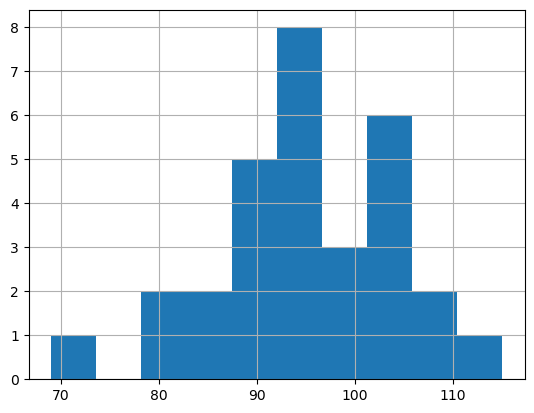

In [3]:
free_viewing_empathy = loader.load_eyeT_empathy_levels(experiment="free")
free_viewing_empathy.hist()

#### __Fixations__

In [4]:
free_fix_features_train, free_fix_labels_train, free_sac_features_train, free_sac_labels_train =  loader.get_eyeT_features_and_labels("train", "free")

In [5]:
free_fix_empathy, free_fix_empathy_trace = modeler.generate_neg_binomial_regression_model("free_fix_neg_bin_regression", free_fix_features_train, free_fix_labels_train)

##### Sampling diagnostics

In [12]:
az.summary(free_fix_empathy_trace, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a         4.54   0.02    4.51     4.57       0.00     0.00   1115.98   
b[0]      0.13   0.14   -0.12     0.39       0.00     0.00   1261.73   
b[1]     -0.03   0.03   -0.09     0.03       0.00     0.00   1196.71   
b[2]      0.22   0.14   -0.04     0.48       0.00     0.00   1164.94   
b[3]     -0.07   0.11   -0.26     0.16       0.00     0.00   1224.21   
b[4]     -0.03   0.02   -0.08     0.01       0.00     0.00   1600.94   
b[5]     -0.17   0.10   -0.35     0.01       0.00     0.00   1248.03   
b[6]     -0.00   0.04   -0.09     0.08       0.00     0.00    914.97   
b[7]     -0.01   0.01   -0.02     0.01       0.00     0.00   2038.77   
b[8]     -0.06   0.04   -0.12     0.01       0.00     0.00    944.74   
b[9]     -0.09   0.05   -0.18     0.01       0.00     0.00    875.00   
b[10]     0.12   0.02    0.08     0.15       0.00     0.00   1800.72   
b[11]     0.02   0.04   -0.04     0.09       0.00     0.00    974.61   
b[12]     0.17   0.03    0.13     0.23       0.00     0.00   2456.27   
b[13]     0.07   0.02    0.04     0.10       0.00     0.00   1475.87   
b[14]    -0.10   0.02   -0.14    -0.07       0.00     0.00   1550.96   
alpha  1035.12  47.64  944.62  1121.43       0.93     0.66   2629.18   

       ess_tail  r_hat  
a       1107.72    1.0  
b[0]    1009.34    1.0  
b[1]    1176.89    1.0  
b[2]    1458.35    1.0  
b[3]    1214.48    1.0  
b[4]    1682.99    1.0  
b[5]    1390.62    1.0  
b[6]    1180.31    1.0  
b[7]    1505.63    1.0  
b[8]     937.84    1.0  
b[9]    1038.89    1.0  
b[10]   1538.19    1.0  
b[11]    963.83    1.0  
b[12]   1487.17    1.0  
b[13]   1257.42    1.0  
b[14]   1415.21    1.0  
alpha   1632.46    1.0

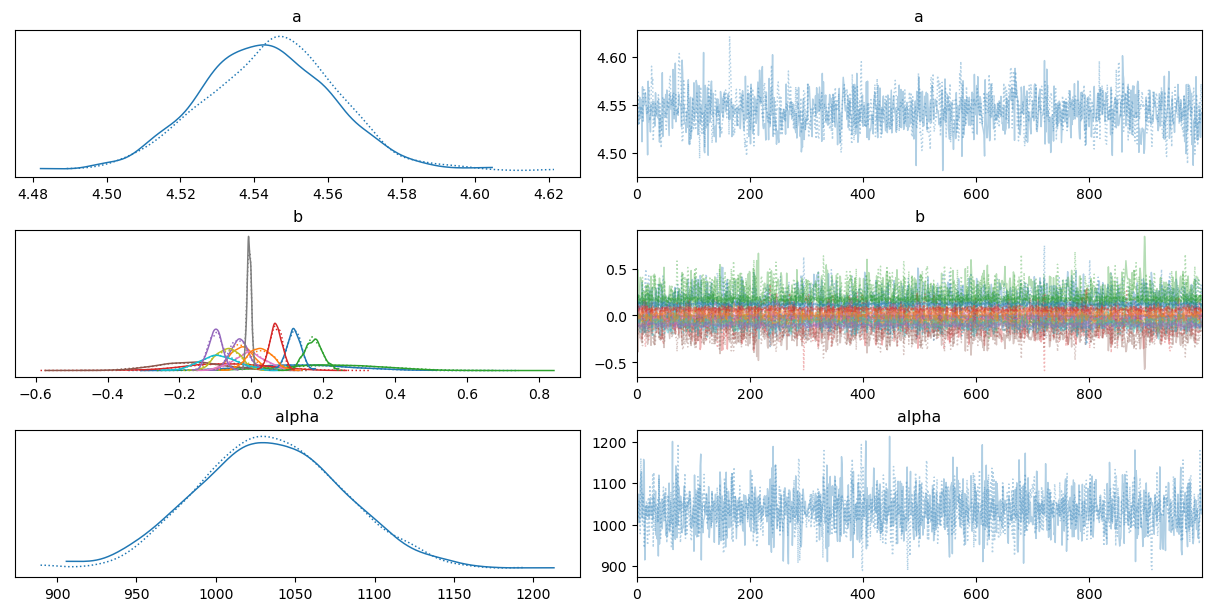

In [13]:
az.plot_trace(free_fix_empathy_trace);

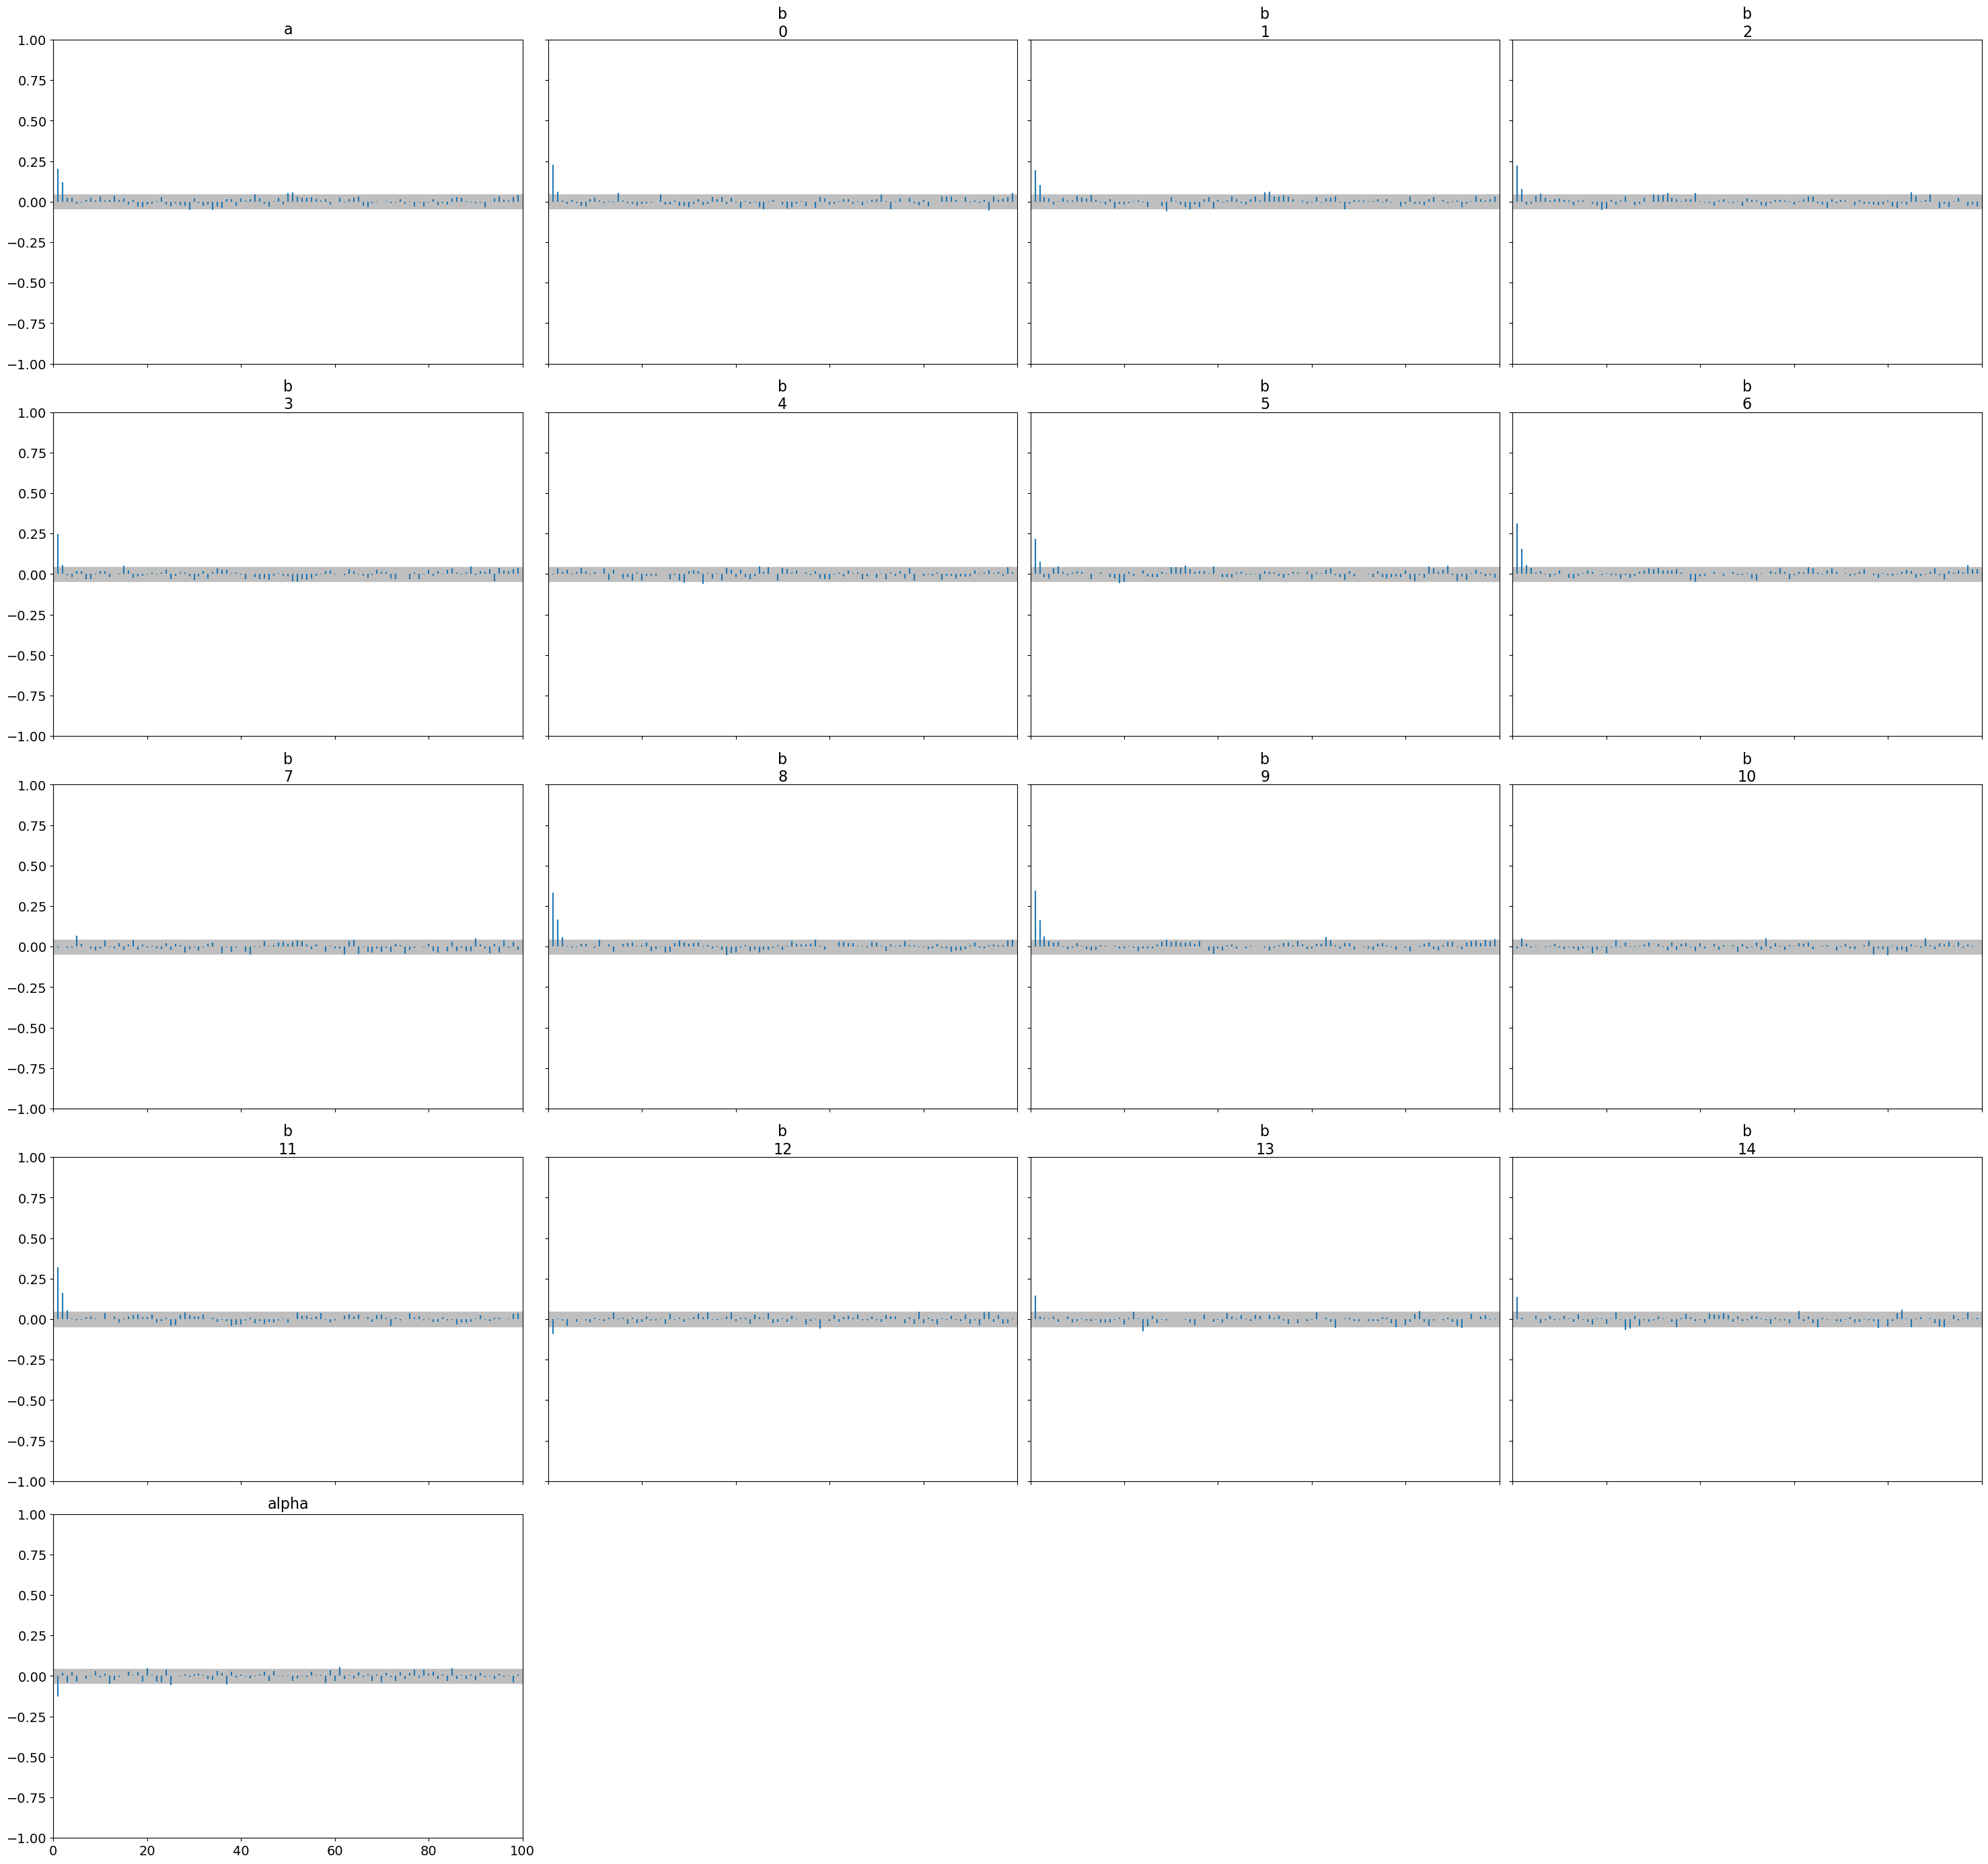

In [14]:
az.plot_autocorr(free_fix_empathy_trace, combined=True);

##### Posterior predictive check

In [9]:
free_fix_ppc = modeler.generate_model_ppc(free_fix_empathy, free_fix_empathy_trace)

In [50]:
sampled_labels = free_fix_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)

In [51]:
rmse, mape = modeler.get_regression_evaluation(free_fix_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.03
MAPE:6.67%


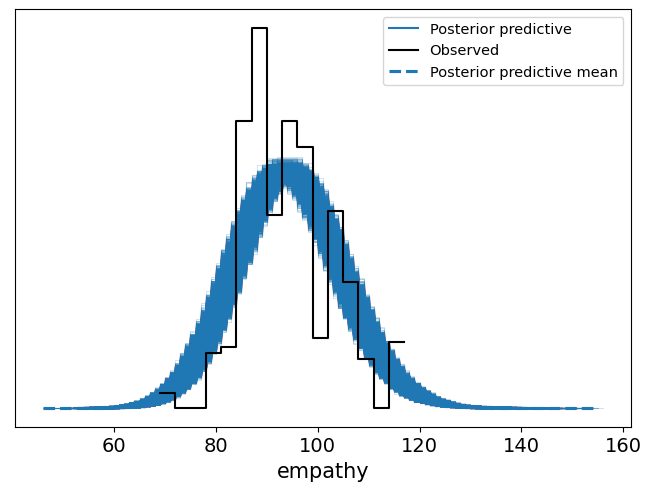

In [18]:
az.plot_ppc(free_fix_ppc);

##### Test predictions

In [19]:
free_fix_features_test, free_fix_labels_test, free_sac_features_test, free_sac_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free")
free_fix_predictions = modeler.generate_model_predictions(free_fix_empathy, free_fix_features_test, free_fix_empathy_trace)

In [20]:
rmse, mape = modeler.get_regression_evaluation(free_fix_predictions, free_fix_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.22
MAPE:6.86%


#### __Saccades__

In [21]:
free_sac_empathy, free_sac_empathy_trace = modeler.generate_neg_binomial_regression_model("free_sac_neg_bin_regression", free_sac_features_train, free_sac_labels_train)

Sampling 2 chains for 7_000 tune and 1_000 draw iterations (14_000 + 2_000 draws total) took 913 seconds.


Saving model...


##### Sampling diagnostics

In [22]:
az.summary(free_sac_empathy_trace, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a        4.60   0.02    4.57     4.63       0.00     0.00   1256.49   1397.48   
b[0]    -0.01   0.04   -0.07     0.07       0.00     0.00   1256.92   1300.81   
b[1]    -0.05   0.02   -0.09    -0.01       0.00     0.00   1472.62   1438.77   
b[2]    -0.07   0.07   -0.21     0.08       0.00     0.00   1005.86    958.14   
b[3]    -0.03   0.06   -0.14     0.08       0.00     0.00   1370.33   1530.33   
b[4]    -0.03   0.06   -0.13     0.08       0.00     0.00   1629.29   1327.53   
b[5]     0.07   0.06   -0.04     0.17       0.00     0.00   1023.39    925.97   
b[6]    -0.01   0.03   -0.06     0.03       0.00     0.00   1208.89   1275.99   
b[7]    -0.01   0.00   -0.01     0.00       0.00     0.00   2066.87   1435.39   
b[8]     0.03   0.02   -0.02     0.07       0.00     0.00   1136.25   1317.50   
b[9]    -0.00   0.04   -0.06     0.07       0.00     0.00   1065.96   1027.83   
b[10]    0.02   0.02   -0.02     0.05       0.00     0.00   1101.71   1450.87   
b[11]   -0.04   0.02   -0.08     0.01       0.00     0.00   1187.33   1436.56   
b[12]   -0.01   0.01   -0.02     0.01       0.00     0.00   1777.98   1419.20   
b[13]   -0.05   0.02   -0.08    -0.02       0.00     0.00   1577.40   1465.81   
b[14]    0.02   0.02   -0.01     0.06       0.00     0.00   1714.90   1695.63   
b[15]    0.08   0.02    0.03     0.11       0.00     0.00   1235.12   1303.55   
b[16]   -0.10   0.02   -0.13    -0.05       0.00     0.00   1248.92   1277.47   
alpha  900.09  48.19  810.83   987.13       1.12     0.79   1836.91   1290.03   

       r_hat  
a        1.0  
b[0]     1.0  
b[1]     1.0  
b[2]     1.0  
b[3]     1.0  
b[4]     1.0  
b[5]     1.0  
b[6]     1.0  
b[7]     1.0  
b[8]     1.0  
b[9]     1.0  
b[10]    1.0  
b[11]    1.0  
b[12]    1.0  
b[13]    1.0  
b[14]    1.0  
b[15]    1.0  
b[16]    1.0  
alpha    1.0

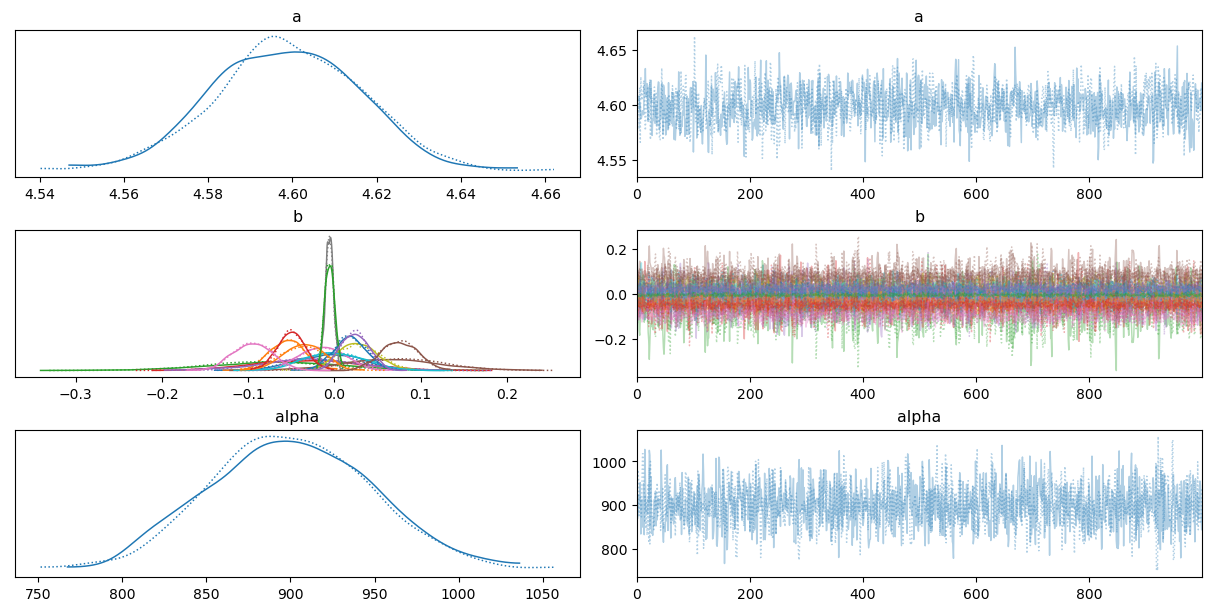

In [23]:
trace = az.plot_trace(free_sac_empathy_trace);

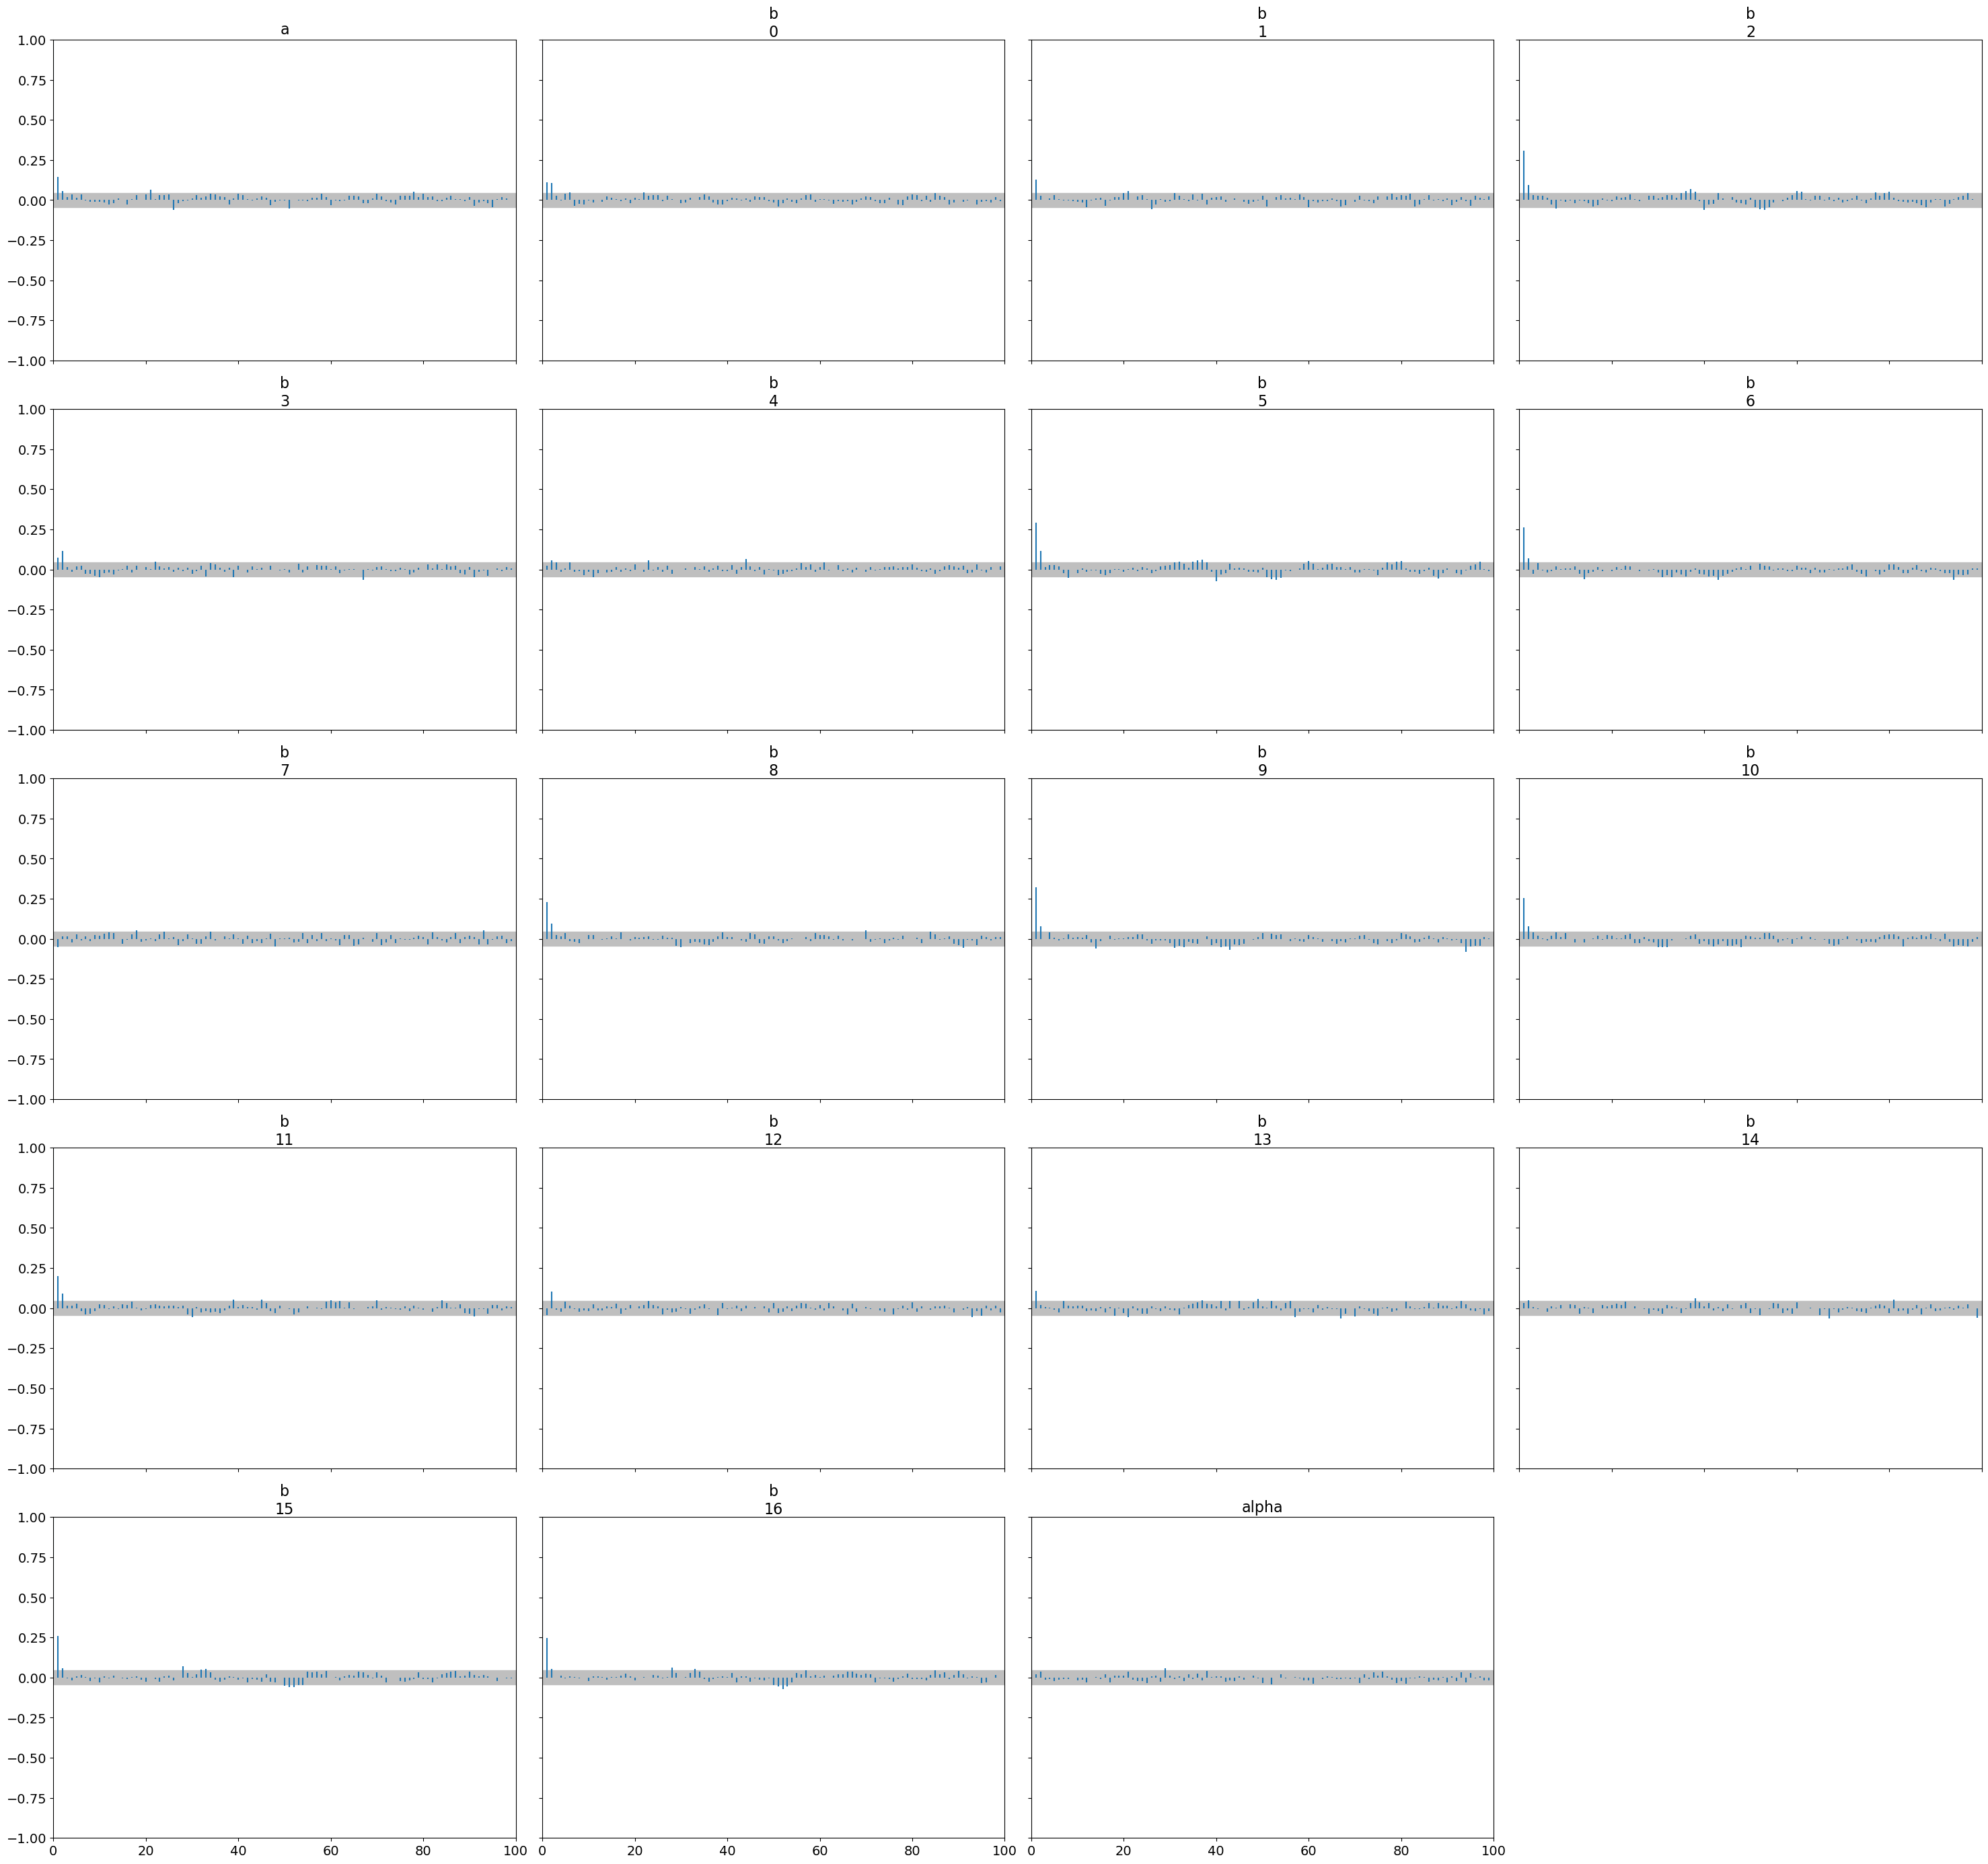

In [24]:
az.plot_autocorr(free_sac_empathy_trace, combined=True);

##### Posterior predictive check

In [25]:
free_sac_ppc = modeler.generate_model_ppc(free_sac_empathy, free_sac_empathy_trace)
sampled_labels = free_sac_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_sac_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.7
MAPE:6.49%


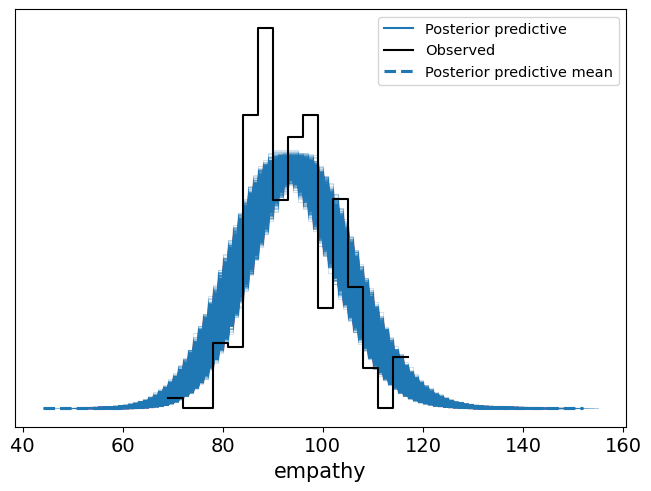

In [26]:
az.plot_ppc(free_sac_ppc);

##### Predictions

In [27]:
free_sac_predictions = modeler.generate_model_predictions(free_sac_empathy, free_sac_features_test, free_sac_empathy_trace)
rmse, mape = modeler.get_regression_evaluation(free_sac_predictions, free_sac_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.04
MAPE:6.75%


#### __Combined predictions__

In [28]:
free_fix_stimuli, free_sac_stimuli = loader.get_stimuli("test", "free")
predicted_empathy = modeler.combine_predictions(free_fix_predictions, free_fix_stimuli, free_sac_predictions, free_sac_stimuli)
real_empathy_values = [free_viewing_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.7
MAPE:7.2%


### __Cognitive empathy__

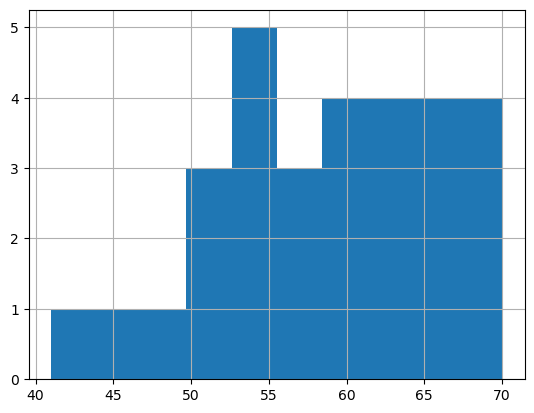

In [5]:
free_viewing_cognitive_empathy = loader.load_eyeT_empathy_levels(experiment="free", type="cognitive")
free_viewing_cognitive_empathy.hist();

#### __Fixations__

In [ ]:
free_fix_cog_features_train, free_fix_cog_labels_train, free_sac_cog_features_train, free_sac_cog_labels_train =  loader.get_eyeT_features_and_labels("train", "free", type="cognitive")

In [18]:
free_fix_cog_empathy, free_fix_cog_trace = modeler.generate_neg_binomial_regression_model("free_fix_cognitive_neg_bin_regression", free_fix_cog_features_train, free_fix_cog_labels_train)

##### Sampling diagnostics

In [13]:
az.summary(free_fix_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.076   0.024    4.031    4.119      0.001    0.001    1106.0   
b[0]     0.066   0.177   -0.257    0.402      0.005    0.004    1242.0   
b[1]    -0.089   0.043   -0.170   -0.009      0.001    0.001    1099.0   
b[2]     0.232   0.186   -0.122    0.567      0.005    0.004    1290.0   
b[3]    -0.025   0.141   -0.302    0.222      0.004    0.003    1223.0   
b[4]    -0.051   0.032   -0.112    0.005      0.001    0.001    1499.0   
b[5]    -0.206   0.128   -0.440    0.031      0.004    0.003    1345.0   
b[6]    -0.158   0.057   -0.265   -0.049      0.002    0.001    1205.0   
b[7]     0.037   0.008    0.022    0.050      0.000    0.000    2538.0   
b[8]    -0.074   0.045   -0.155    0.015      0.001    0.001     959.0   
b[9]     0.113   0.065   -0.008    0.233      0.002    0.001    1116.0   
b[10]    0.044   0.025   -0.003    0.093      0.001    0.000    1596.0   
b[11]    0.022   0.044   -0.066    0.101      0.001    0.001    1009.0   
b[12]    0.211   0.033    0.150    0.276      0.001    0.001    2052.0   
b[13]    0.012   0.021   -0.026    0.053      0.001    0.000    1260.0   
b[14]   -0.007   0.024   -0.052    0.036      0.001    0.001    1274.0   
alpha  729.939  41.004  649.998  804.160      0.815    0.580    2554.0   

       ess_tail  r_hat  
a        1235.0    1.0  
b[0]     1282.0    1.0  
b[1]     1397.0    1.0  
b[2]     1254.0    1.0  
b[3]     1137.0    1.0  
b[4]     1341.0    1.0  
b[5]     1348.0    1.0  
b[6]     1481.0    1.0  
b[7]     1281.0    1.0  
b[8]     1093.0    1.0  
b[9]     1256.0    1.0  
b[10]    1395.0    1.0  
b[11]    1145.0    1.0  
b[12]    1507.0    1.0  
b[13]    1303.0    1.0  
b[14]    1253.0    1.0  
alpha    1500.0    1.0

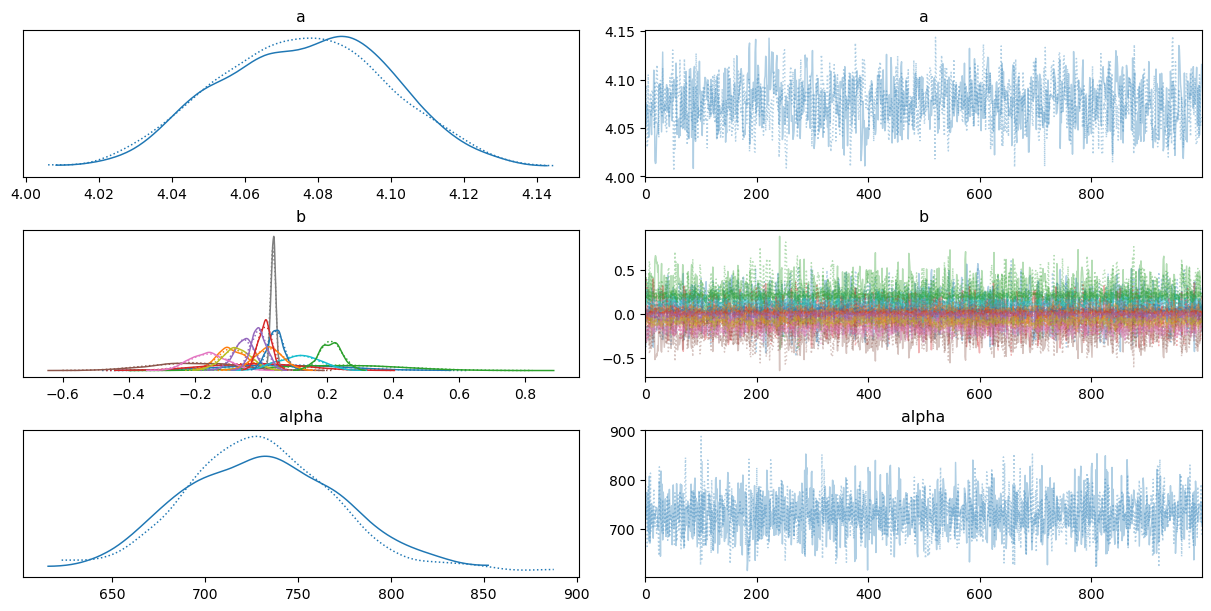

In [14]:
az.plot_trace(free_fix_cog_trace);

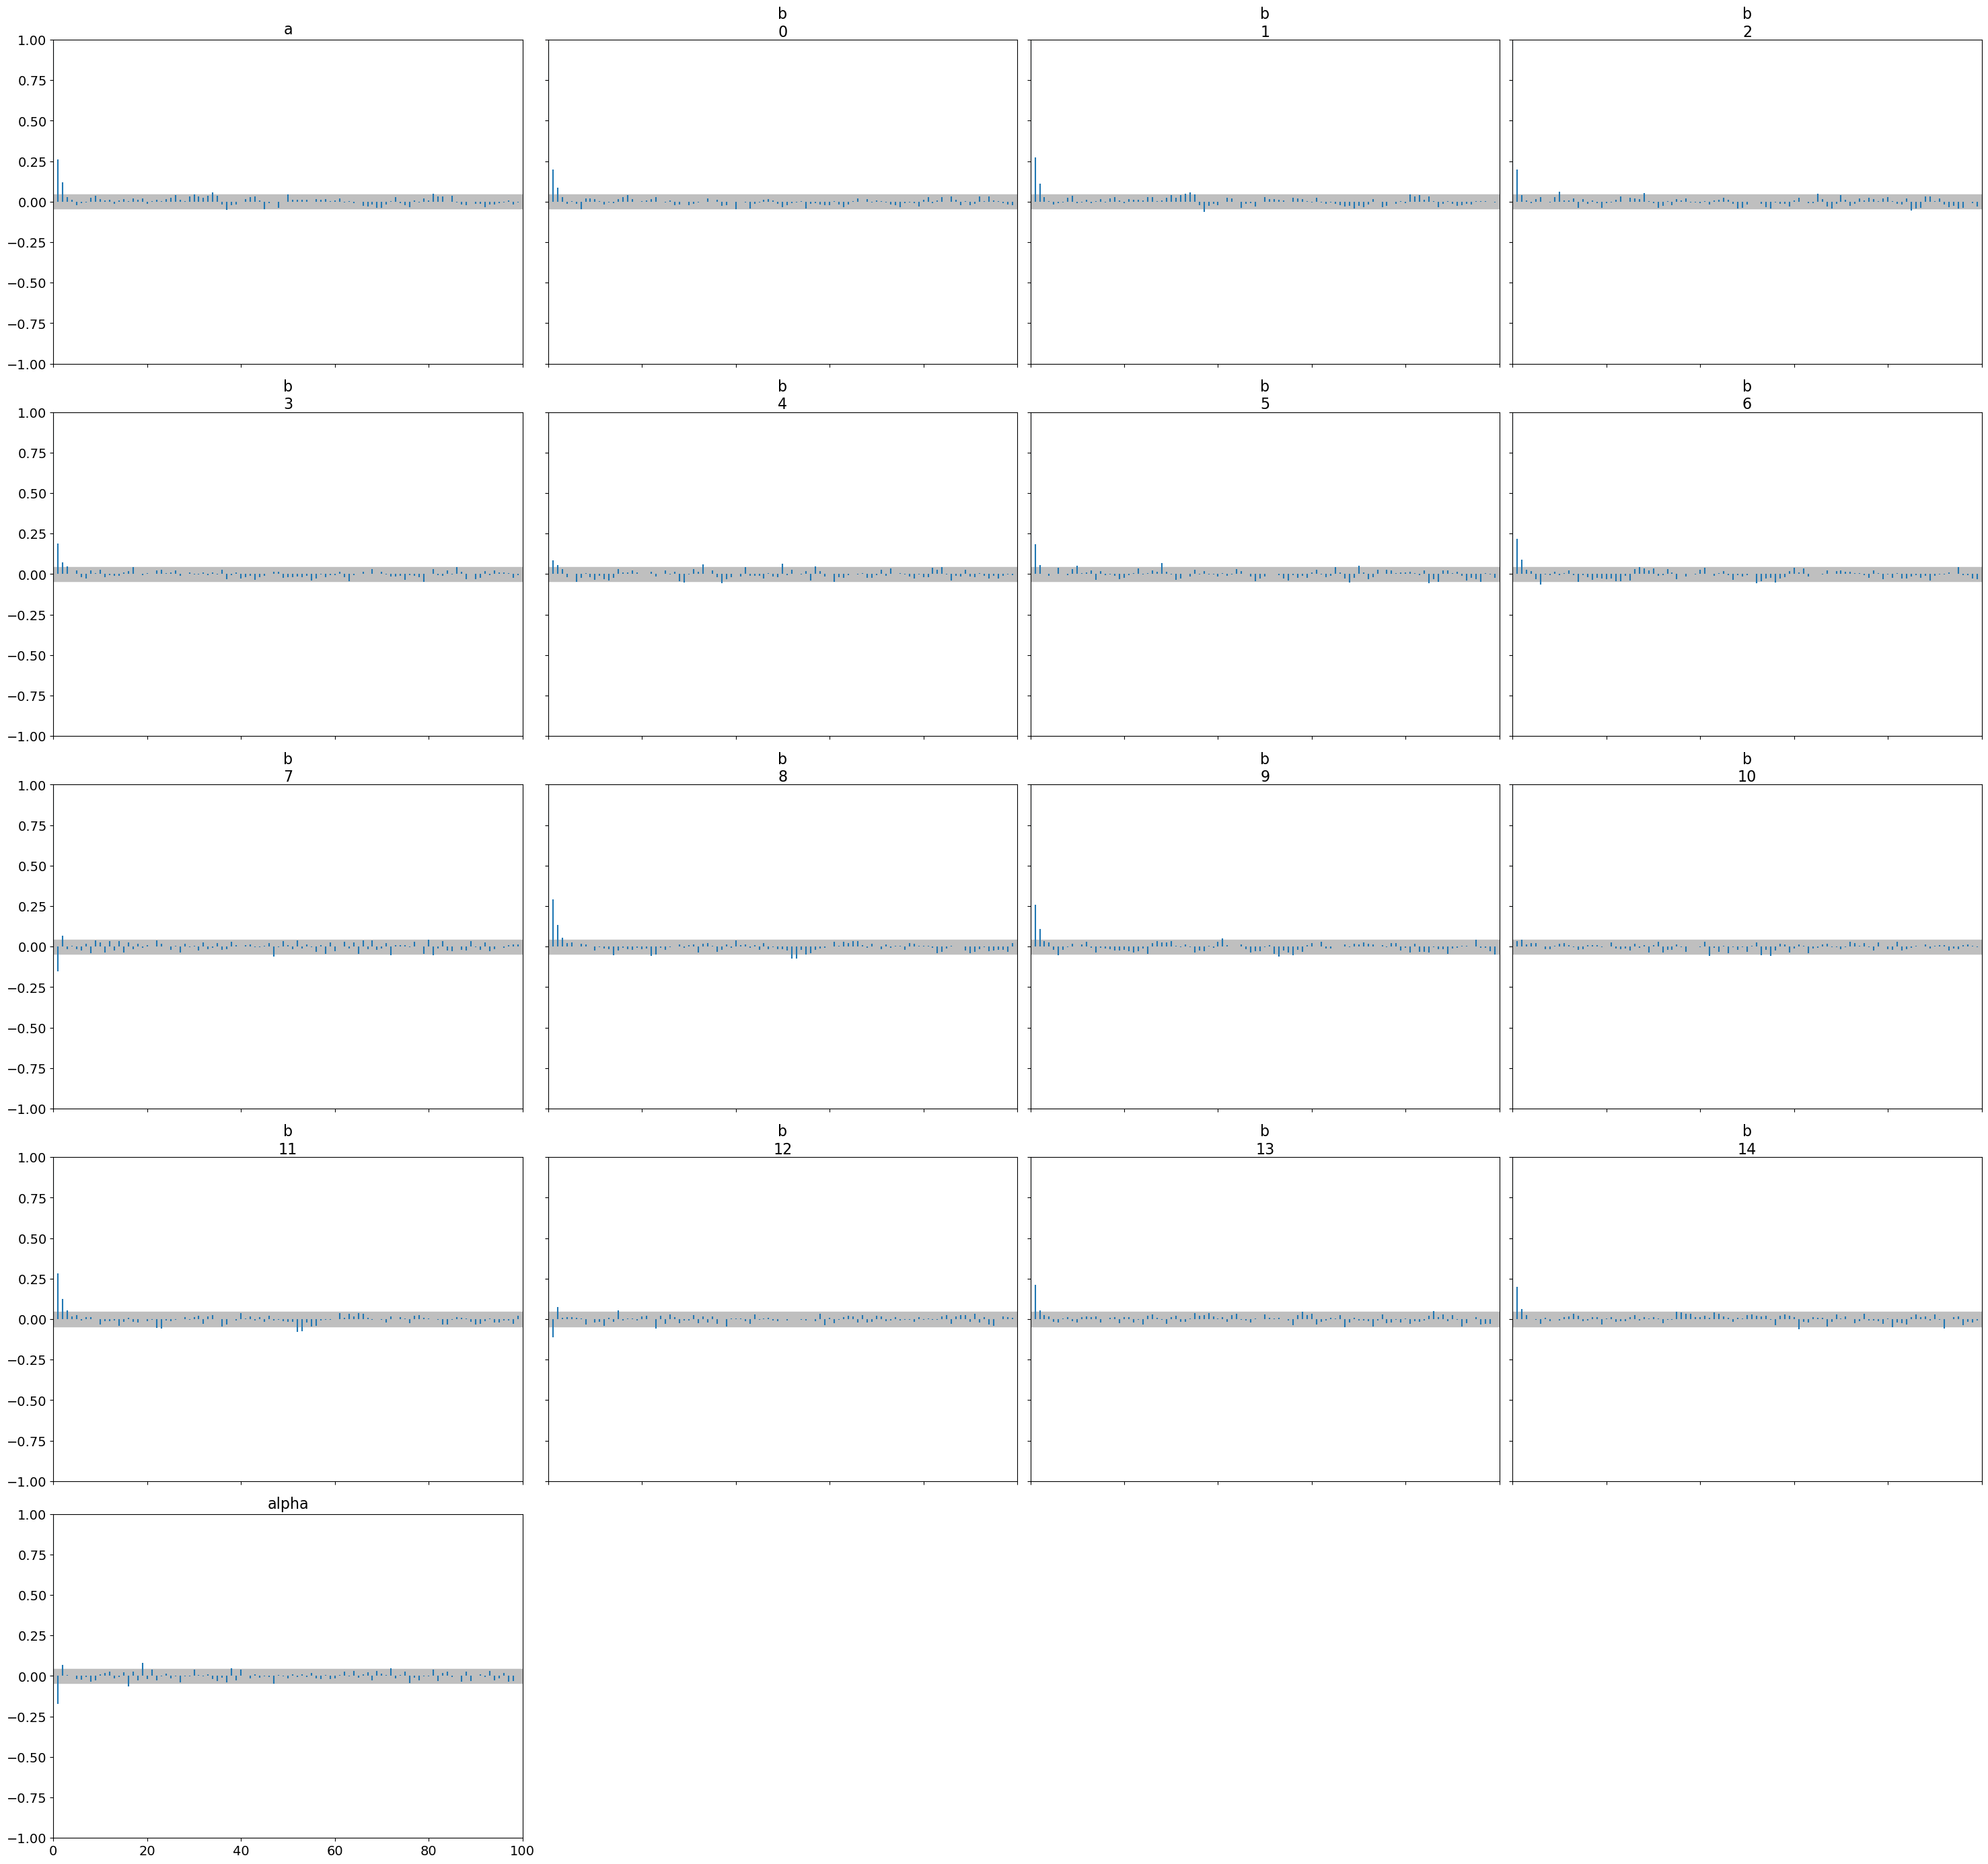

In [15]:
az.plot_autocorr(free_fix_cog_trace, combined=True);

##### Posterior predictive

In [17]:
free_fix_cog_ppc = modeler.generate_model_ppc(free_fix_cog_empathy, free_fix_cog_trace)
sampled_labels = free_fix_cog_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_fix_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:6.61
MAPE:9.65%


##### Test predictions

In [19]:
free_fix_cog_features_test, free_fix_cog_labels_test, free_sac_cog_features_test, free_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "cognitive")
free_fix_cog_predictions = modeler.generate_model_predictions(free_fix_cog_empathy, free_fix_cog_features_test, free_fix_cog_trace)

In [20]:
rmse, mape = modeler.get_regression_evaluation(free_fix_cog_predictions, free_fix_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.04
MAPE:10.16%


#### __Saccades__

In [20]:
free_sac_cog_empathy, free_sac_cog_trace = modeler.generate_neg_binomial_regression_model("free_sac_cognitive_neg_bin_regression", free_sac_cog_features_train, free_sac_cog_labels_train)

##### Sampling diagnostics

In [21]:
az.summary(free_sac_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.107   0.022    4.068    4.152      0.001    0.000    1287.0   
b[0]    -0.005   0.049   -0.099    0.084      0.001    0.001    1212.0   
b[1]    -0.060   0.027   -0.110   -0.008      0.001    0.001    1365.0   
b[2]    -0.010   0.092   -0.175    0.168      0.002    0.002    1621.0   
b[3]     0.044   0.078   -0.093    0.195      0.002    0.002    1076.0   
b[4]    -0.060   0.070   -0.197    0.056      0.002    0.001    1841.0   
b[5]    -0.033   0.069   -0.162    0.091      0.002    0.001    1704.0   
b[6]    -0.029   0.034   -0.094    0.034      0.001    0.001     963.0   
b[7]     0.006   0.006   -0.005    0.016      0.000    0.000    1396.0   
b[8]     0.041   0.029   -0.014    0.095      0.001    0.001    1342.0   
b[9]     0.019   0.045   -0.058    0.110      0.002    0.001     879.0   
b[10]   -0.010   0.023   -0.051    0.035      0.001    0.001     976.0   
b[11]   -0.062   0.031   -0.119   -0.005      0.001    0.001    1393.0   
b[12]    0.007   0.007   -0.007    0.021      0.000    0.000    1357.0   
b[13]   -0.107   0.019   -0.145   -0.073      0.000    0.000    1748.0   
b[14]    0.081   0.021    0.040    0.118      0.000    0.000    1900.0   
b[15]    0.046   0.027   -0.007    0.093      0.001    0.000    1591.0   
b[16]   -0.008   0.028   -0.059    0.044      0.001    0.001    1602.0   
alpha  615.912  39.358  547.704  694.090      0.774    0.553    2610.0   

       ess_tail  r_hat  
a        1482.0    1.0  
b[0]     1185.0    1.0  
b[1]     1357.0    1.0  
b[2]     1483.0    1.0  
b[3]     1486.0    1.0  
b[4]     1631.0    1.0  
b[5]     1387.0    1.0  
b[6]      945.0    1.0  
b[7]     1202.0    1.0  
b[8]     1388.0    1.0  
b[9]      984.0    1.0  
b[10]    1261.0    1.0  
b[11]    1393.0    1.0  
b[12]    1552.0    1.0  
b[13]    1719.0    1.0  
b[14]    1386.0    1.0  
b[15]    1221.0    1.0  
b[16]    1188.0    1.0  
alpha    1503.0    1.0

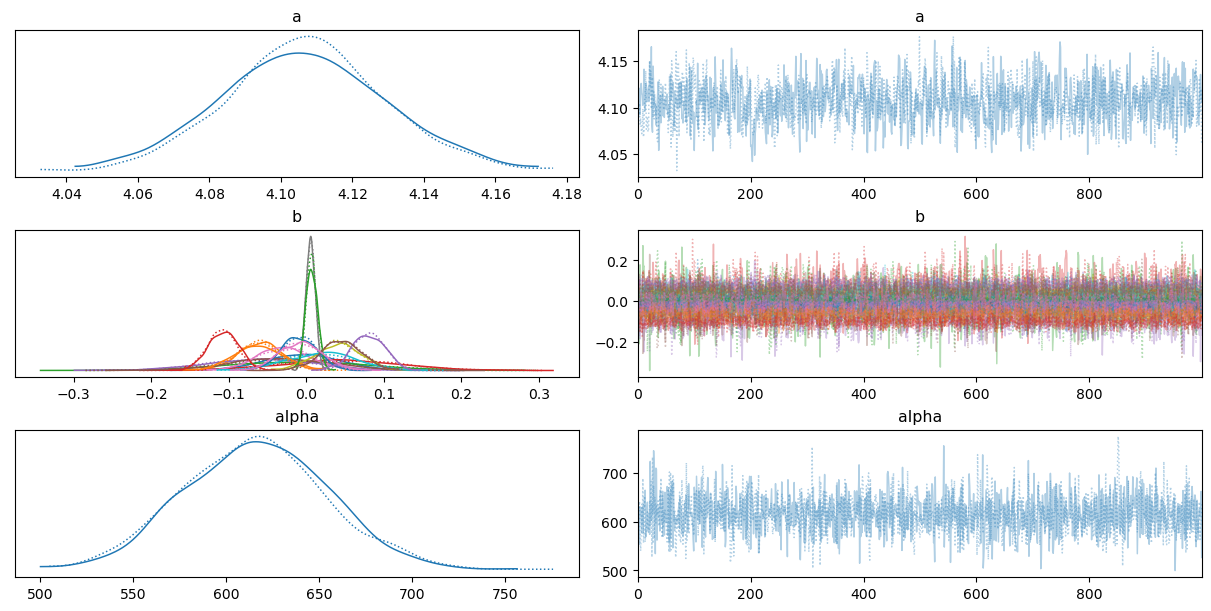

In [22]:
az.plot_trace(free_sac_cog_trace);

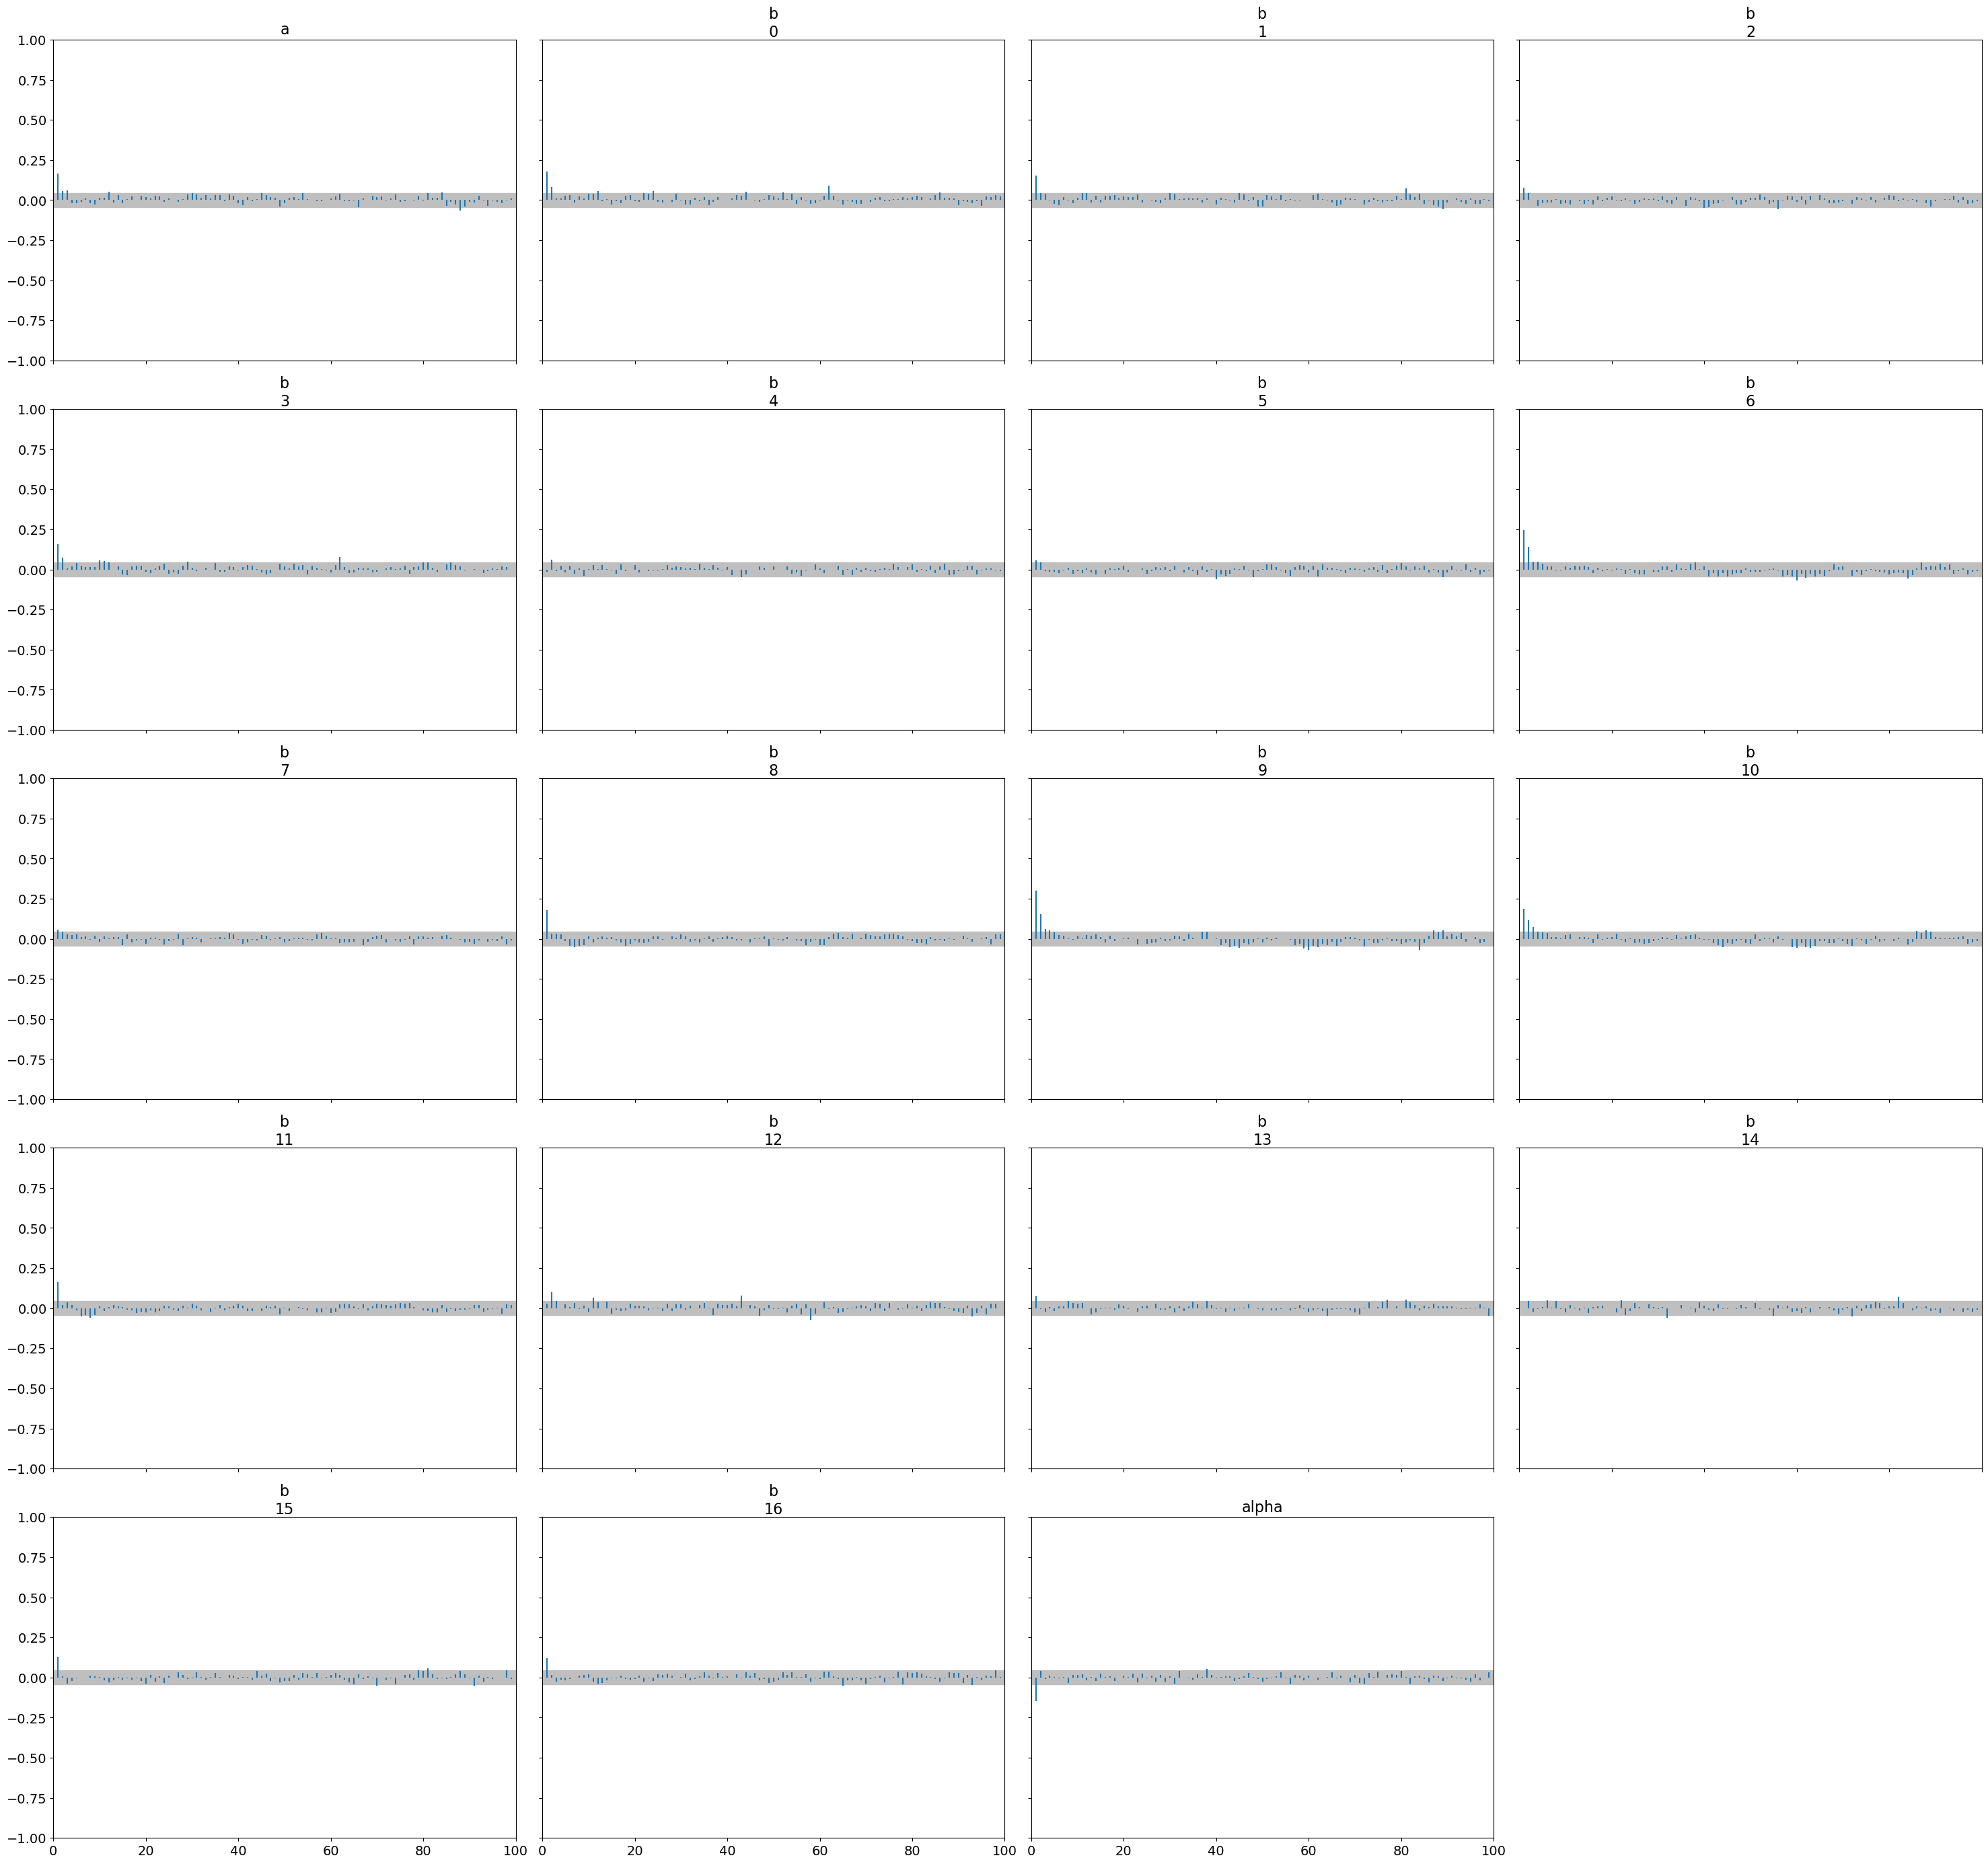

In [23]:
az.plot_autocorr(free_sac_cog_trace, combined=True);

##### Posterior predictive check

In [12]:
free_sac_cog_ppc = modeler.generate_model_ppc(free_sac_cog_empathy, free_sac_cog_trace)
sampled_labels = free_sac_cog_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_sac_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:6.55
MAPE:9.52%


##### Test predictions

In [13]:
free_fix_cog_features_test, free_fix_cog_labels_test, free_sac_cog_features_test, free_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "cognitive")
free_sac_cog_predictions = modeler.generate_model_predictions(free_sac_cog_empathy, free_sac_cog_features_test, free_sac_cog_trace)

In [14]:
rmse, mape = modeler.get_regression_evaluation(free_sac_cog_predictions, free_sac_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.04
MAPE:10.18%


#### __Combined predictions__

In [23]:
free_fix_cog_stimuli, free_sac_cog_stimuli = loader.get_stimuli("test", "free")
predicted_empathy = modeler.combine_predictions(free_fix_cog_predictions, free_fix_cog_stimuli, free_sac_cog_predictions, free_sac_cog_stimuli)
real_empathy_cog_values = [free_viewing_cognitive_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_cog_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:6.96
MAPE:10.1%


### __Affective empathy__

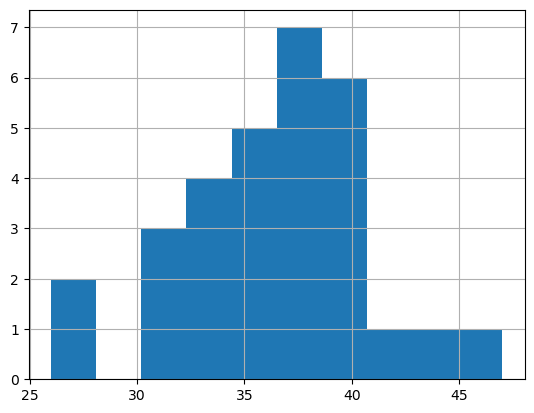

In [26]:
free_viewing_affective_empathy = loader.load_eyeT_empathy_levels(experiment="free", type="affective")
free_viewing_affective_empathy.hist();

#### __Fixations__

In [38]:
free_fix_aff_features_train, free_fix_aff_labels_train, free_sac_aff_features_train, free_sac_aff_labels_train =  loader.get_eyeT_features_and_labels("train", "free", type="affective")

In [22]:
free_fix_aff_empathy, free_fix_aff_trace = modeler.generate_neg_binomial_regression_model("free_fix_affective_neg_bin_regression", free_fix_aff_features_train, free_fix_aff_labels_train)

##### Sampling diagnostics

In [41]:
az.summary(free_fix_aff_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        3.563   0.028    3.509    3.614      0.001    0.001    1205.0   
b[0]     0.246   0.211   -0.179    0.618      0.005    0.004    1531.0   
b[1]     0.061   0.048   -0.028    0.150      0.001    0.001    1176.0   
b[2]     0.208   0.231   -0.201    0.650      0.007    0.005    1047.0   
b[3]    -0.147   0.168   -0.473    0.154      0.004    0.003    1529.0   
b[4]    -0.008   0.038   -0.078    0.065      0.001    0.001    1849.0   
b[5]    -0.104   0.157   -0.394    0.180      0.005    0.004    1043.0   
b[6]     0.244   0.071    0.113    0.374      0.002    0.002    1030.0   
b[7]    -0.074   0.010   -0.093   -0.055      0.000    0.000    2568.0   
b[8]    -0.053   0.057   -0.166    0.048      0.002    0.001     979.0   
b[9]    -0.424   0.083   -0.571   -0.262      0.003    0.002    1005.0   
b[10]    0.244   0.033    0.186    0.306      0.001    0.001    1830.0   
b[11]    0.030   0.055   -0.066    0.139      0.002    0.001     996.0   
b[12]    0.108   0.041    0.031    0.182      0.001    0.001    1730.0   
b[13]    0.157   0.027    0.107    0.208      0.001    0.001    1398.0   
b[14]   -0.248   0.031   -0.306   -0.191      0.001    0.001    1403.0   
alpha  835.959  43.960  754.211  918.176      0.916    0.649    2307.0   

       ess_tail  r_hat  
a        1362.0    1.0  
b[0]     1481.0    1.0  
b[1]     1476.0    1.0  
b[2]     1239.0    1.0  
b[3]     1540.0    1.0  
b[4]     1189.0    1.0  
b[5]     1240.0    1.0  
b[6]     1117.0    1.0  
b[7]     1348.0    1.0  
b[8]     1177.0    1.0  
b[9]     1158.0    1.0  
b[10]    1496.0    1.0  
b[11]    1111.0    1.0  
b[12]    1402.0    1.0  
b[13]    1311.0    1.0  
b[14]    1228.0    1.0  
alpha    1215.0    1.0

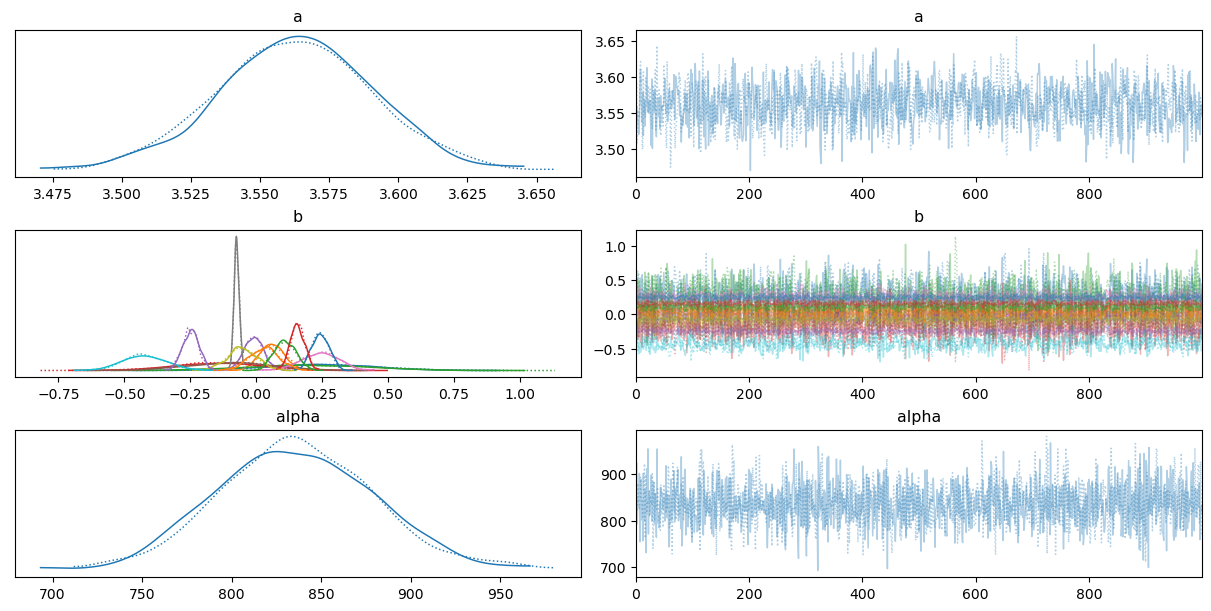

In [42]:
az.plot_trace(free_fix_aff_trace);

In [ ]:
az.plot_autocorr(free_fix_aff_trace)

##### Posterior predictive

In [19]:
free_fix_aff_ppc = modeler.generate_model_ppc(free_fix_aff_empathy, free_fix_aff_trace)
sampled_labels = free_fix_aff_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_fix_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.9
MAPE:8.45%


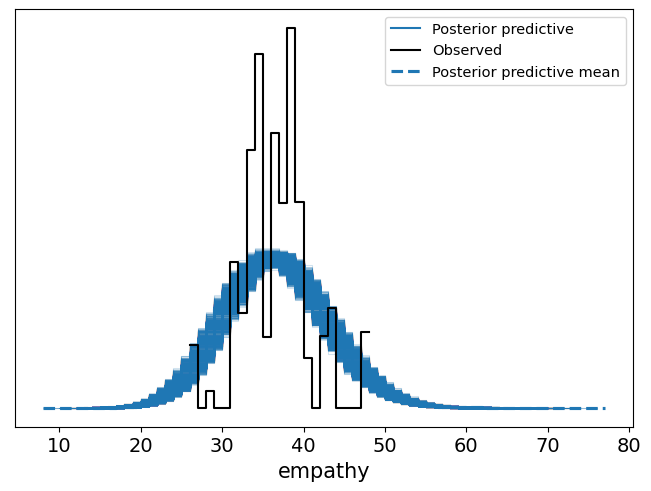

In [23]:
az.plot_ppc(free_fix_aff_ppc);

##### Test predictions

In [24]:
free_fix_aff_features_test, free_fix_aff_labels_test, free_sac_aff_features_test, free_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "affective")
free_fix_aff_predictions = modeler.generate_model_predictions(free_fix_aff_empathy, free_fix_aff_features_test, free_fix_aff_trace)

In [45]:
rmse, mape = modeler.get_regression_evaluation(free_fix_aff_predictions, free_fix_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.54
MAPE:7.27%


#### __Saccades__

In [14]:
free_fix_aff_features_train, free_fix_aff_labels_train, free_sac_aff_features_train, free_sac_aff_labels_train =  loader.get_eyeT_features_and_labels("train", "free", type="affective")
free_sac_aff_empathy, free_sac_aff_trace = modeler.generate_neg_binomial_regression_model("free_sac_affective_neg_bin_regression", free_sac_aff_features_train, free_sac_aff_labels_train)

##### Sampling diagnostics

In [6]:
az.summary(free_sac_aff_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        3.653   0.029    3.600    3.707      0.001    0.001    1101.0   
b[0]    -0.001   0.063   -0.105    0.132      0.002    0.001    1025.0   
b[1]    -0.044   0.035   -0.107    0.021      0.001    0.001    1333.0   
b[2]    -0.162   0.117   -0.372    0.078      0.003    0.002    1484.0   
b[3]    -0.155   0.101   -0.345    0.032      0.003    0.002     977.0   
b[4]     0.026   0.090   -0.148    0.185      0.002    0.002    1728.0   
b[5]     0.229   0.087    0.055    0.382      0.002    0.002    1532.0   
b[6]     0.015   0.043   -0.069    0.092      0.001    0.001    1327.0   
b[7]    -0.024   0.007   -0.039   -0.011      0.000    0.000    1918.0   
b[8]     0.006   0.037   -0.069    0.072      0.001    0.001    1818.0   
b[9]    -0.040   0.057   -0.149    0.065      0.002    0.001    1249.0   
b[10]    0.066   0.029    0.013    0.122      0.001    0.001    1350.0   
b[11]    0.001   0.039   -0.067    0.077      0.001    0.001    1841.0   
b[12]   -0.026   0.009   -0.041   -0.008      0.000    0.000    1277.0   
b[13]    0.042   0.025   -0.003    0.089      0.001    0.000    1718.0   
b[14]   -0.068   0.027   -0.119   -0.020      0.001    0.000    1907.0   
b[15]    0.125   0.033    0.063    0.188      0.001    0.001    1465.0   
b[16]   -0.241   0.035   -0.307   -0.177      0.001    0.001    1535.0   
alpha  683.353  40.751  601.344  756.948      0.808    0.571    2489.0   

       ess_tail  r_hat  
a        1269.0   1.01  
b[0]      952.0   1.00  
b[1]     1541.0   1.00  
b[2]     1258.0   1.00  
b[3]      993.0   1.01  
b[4]     1478.0   1.00  
b[5]     1262.0   1.00  
b[6]     1275.0   1.00  
b[7]     1483.0   1.00  
b[8]     1449.0   1.00  
b[9]     1204.0   1.00  
b[10]    1193.0   1.00  
b[11]    1508.0   1.00  
b[12]    1352.0   1.00  
b[13]    1328.0   1.00  
b[14]    1339.0   1.00  
b[15]    1394.0   1.00  
b[16]    1517.0   1.00  
alpha    1669.0   1.00

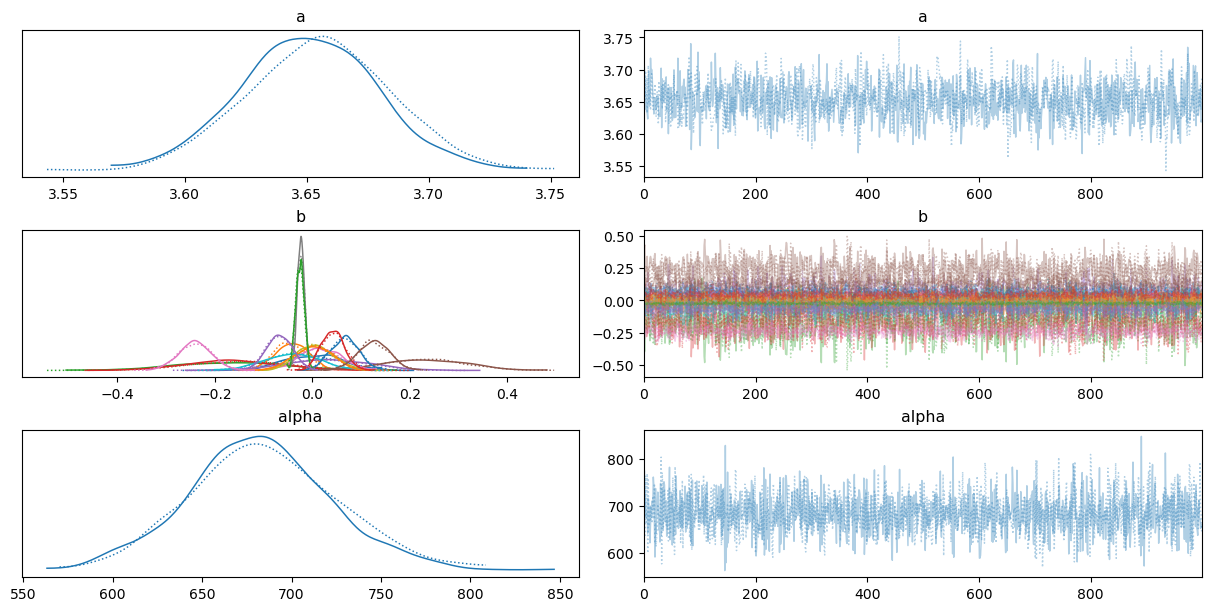

In [7]:
az.plot_trace(free_sac_aff_trace);

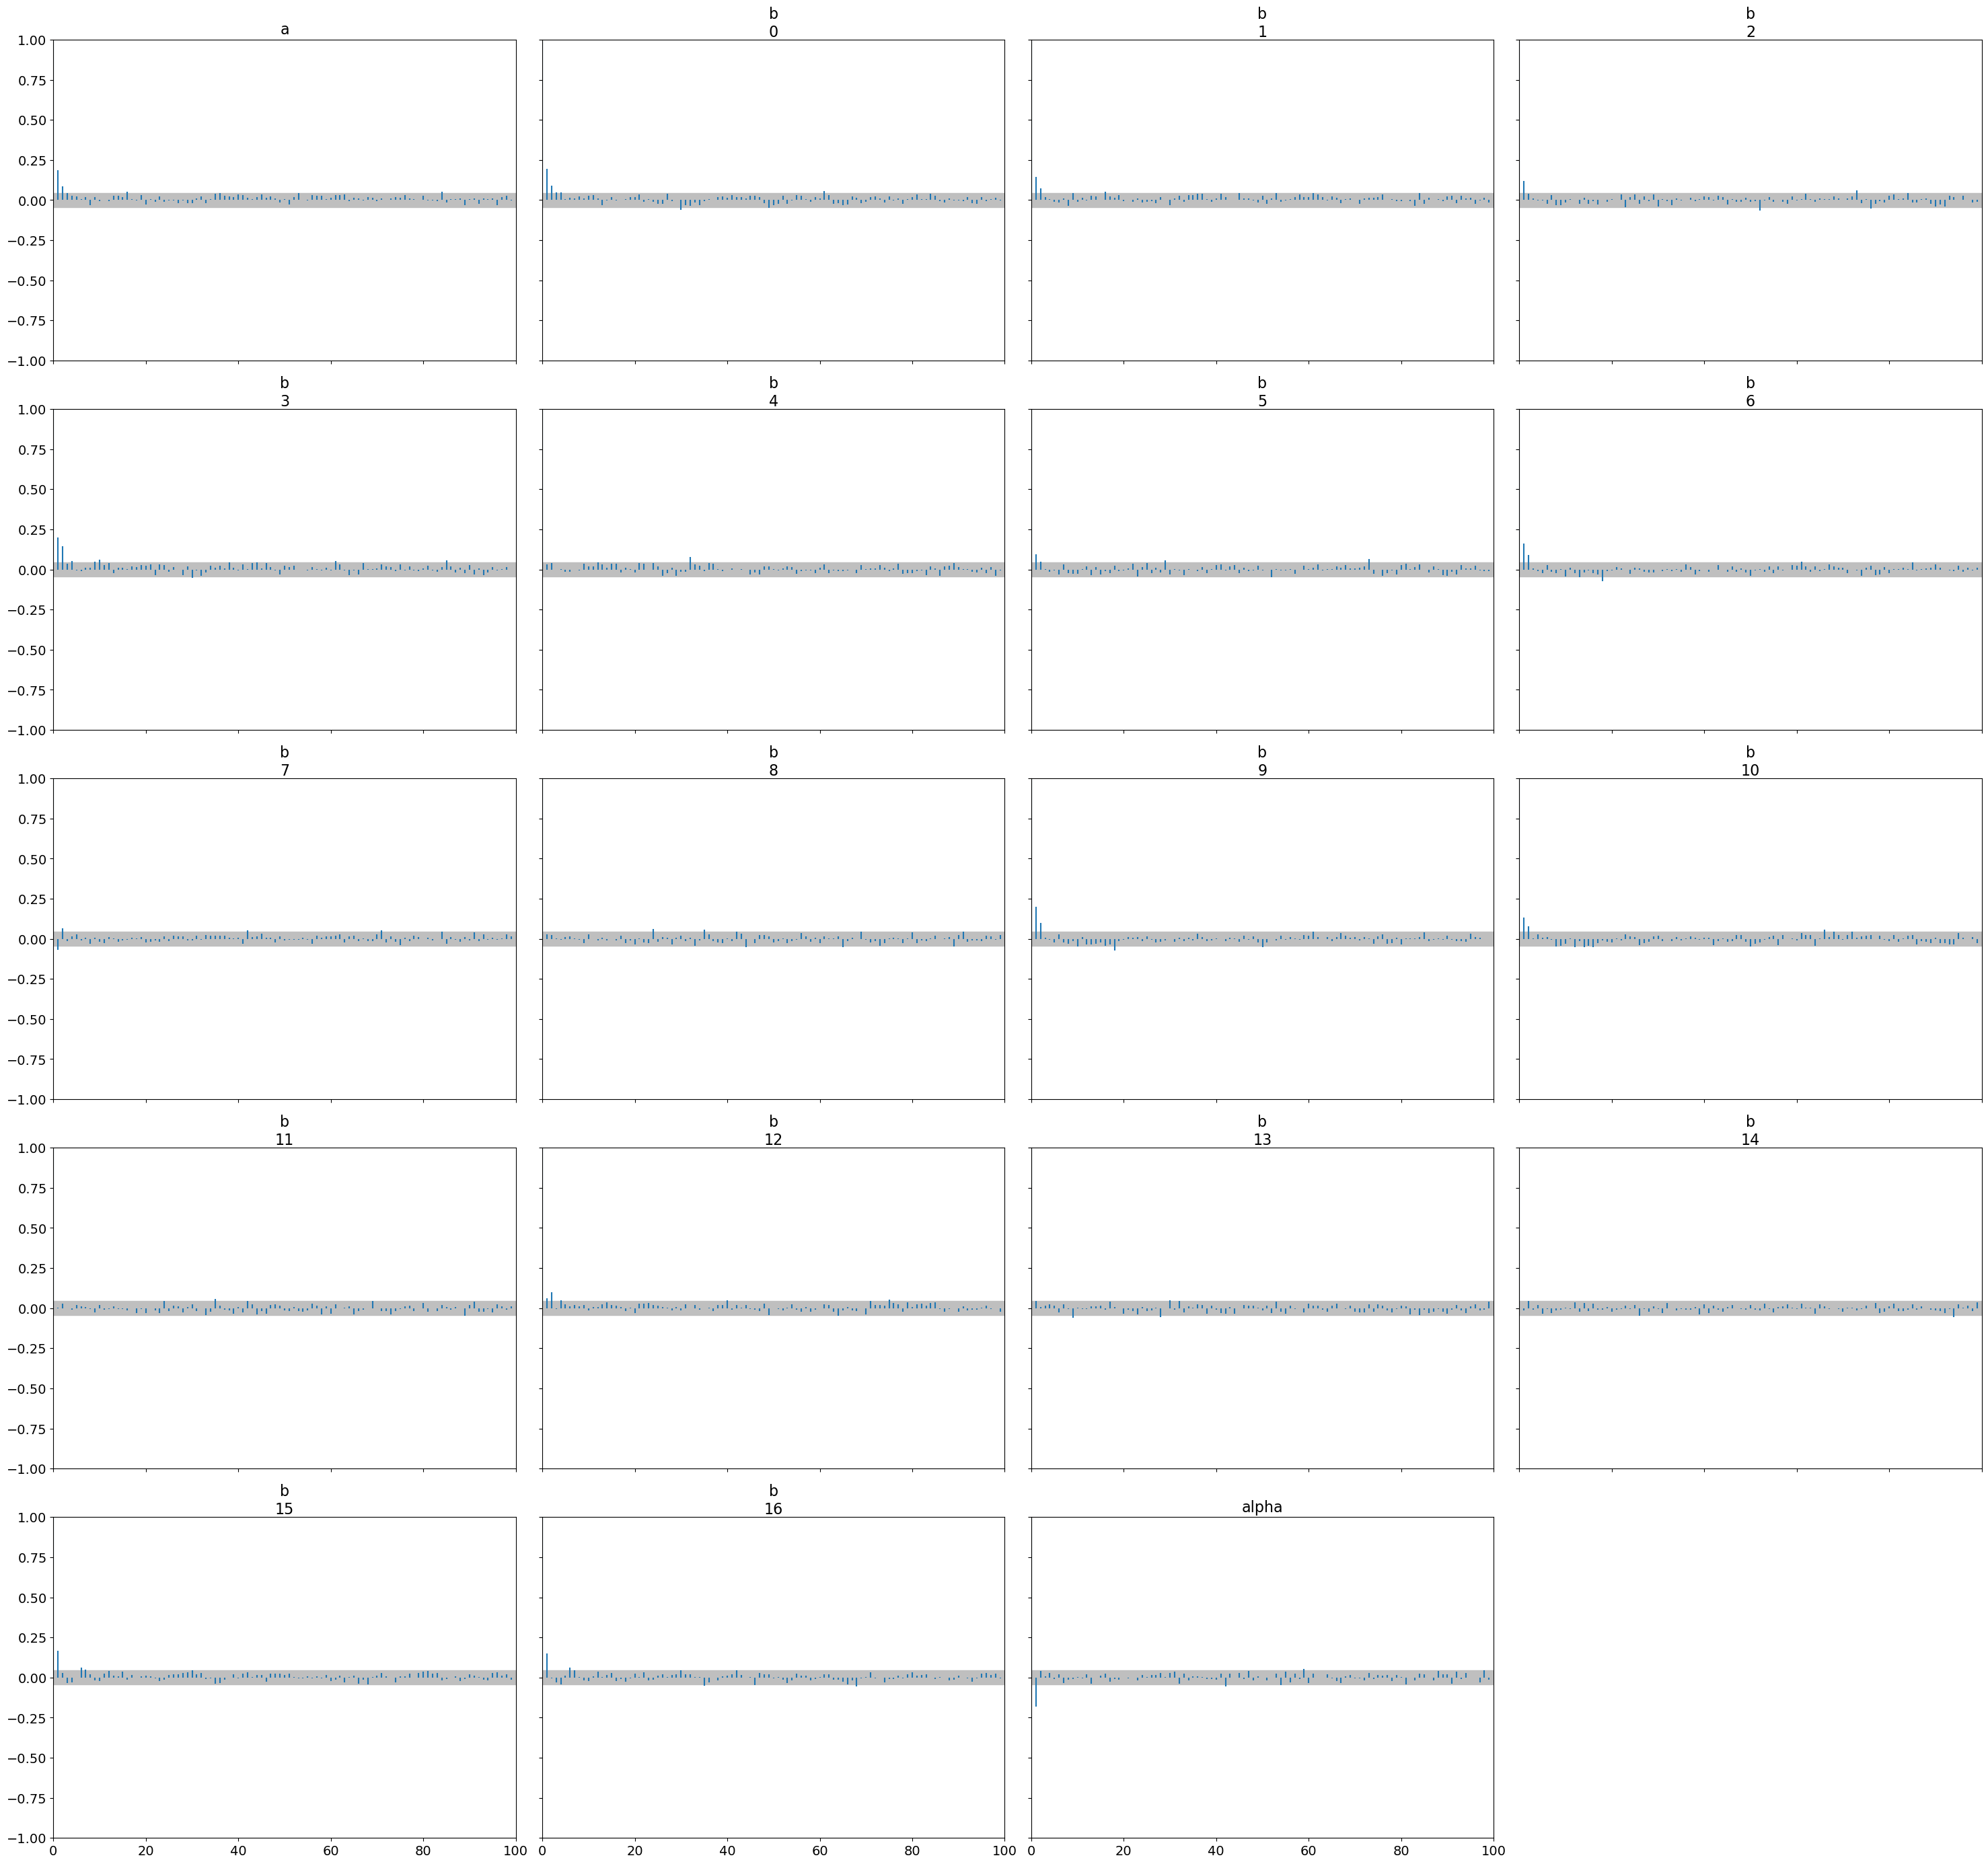

In [15]:
az.plot_autocorr(free_sac_aff_trace, combined=True);

##### Posterior predictive

In [9]:
free_sac_aff_ppc = modeler.generate_model_ppc(free_sac_aff_empathy, free_sac_aff_trace)
sampled_labels = free_sac_aff_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_sac_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.83
MAPE:8.32%


<AxesSubplot: xlabel='empathy'>

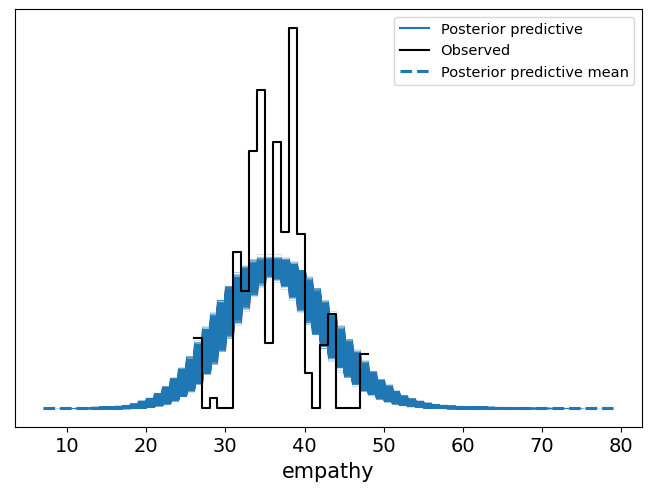

In [10]:
az.plot_ppc(free_sac_aff_ppc)

##### Test predictions

In [11]:
free_fix_aff_features_test, free_fix_aff_labels_test, free_sac_aff_features_test, free_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "affective")
free_sac_aff_predictions = modeler.generate_model_predictions(free_sac_aff_empathy, free_sac_aff_features_test, free_sac_aff_trace)
rmse, mape = modeler.get_regression_evaluation(free_sac_aff_predictions, free_sac_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.59
MAPE:7.11%


#### __Combined predictions__

In [27]:
free_fix_aff_stimuli, free_sac_aff_stimuli = loader.get_stimuli("test", "free")
predicted_empathy = modeler.combine_predictions(free_fix_aff_predictions, free_fix_aff_stimuli, free_sac_aff_predictions, free_sac_aff_stimuli)
real_empathy_aff_values = [free_viewing_affective_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_aff_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.66
MAPE:7.82%


## __Task oriented__

### __General empathy__

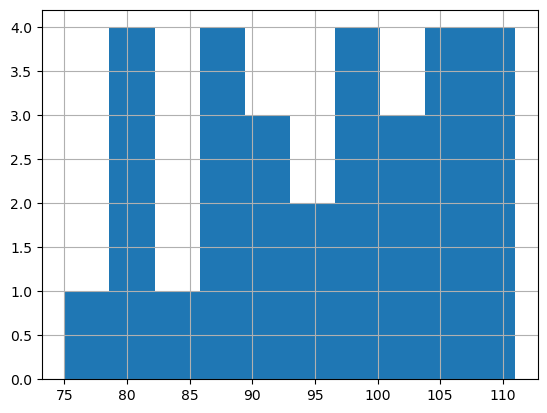

In [4]:
task_oriented_empathy = loader.load_eyeT_empathy_levels(experiment="task")
task_oriented_empathy.hist();

#### __Fixations__

In [5]:
task_fix_features_train, task_fix_labels_train, task_sac_features_train, task_sac_labels_train =  loader.get_eyeT_features_and_labels("train", "task")

In [16]:
task_fix_empathy, task_fix_empathy_trace = modeler.generate_neg_binomial_regression_model("task_fix_neg_bin_regression", task_fix_features_train, task_fix_labels_train)

##### Sampling diagnostics

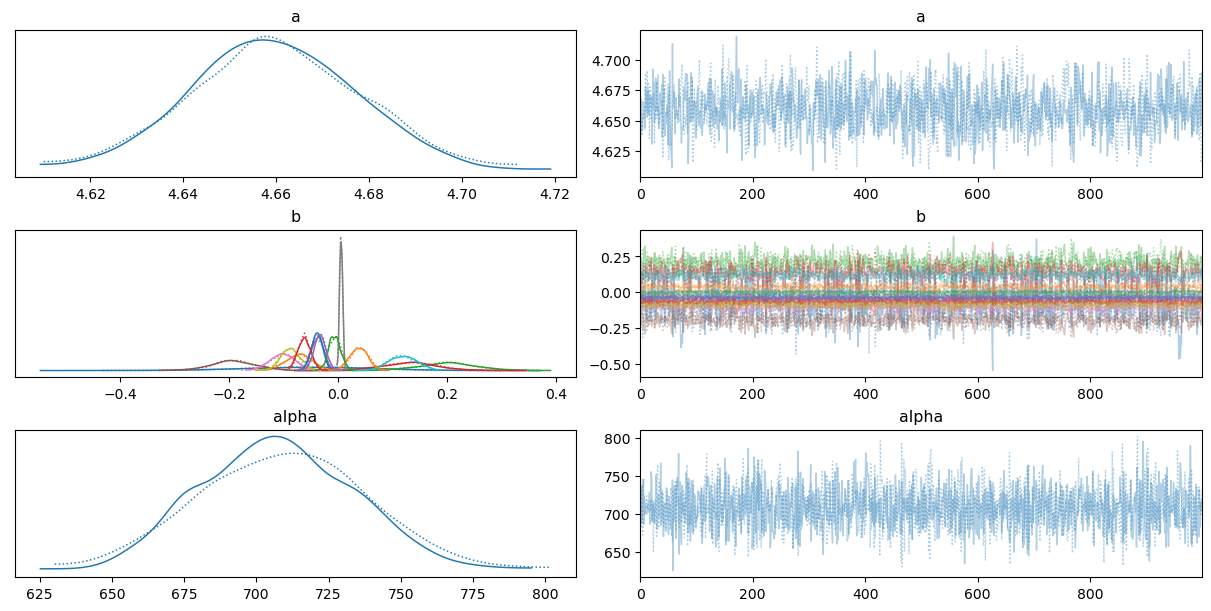

In [7]:
az.plot_trace(task_fix_empathy_trace);

In [8]:
az.summary(task_fix_empathy_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.660   0.018    4.626    4.694      0.000    0.000    1390.0   
b[0]    -0.058   0.114   -0.253    0.165      0.003    0.003    1336.0   
b[1]    -0.072   0.024   -0.118   -0.028      0.001    0.000    1332.0   
b[2]     0.201   0.052    0.100    0.294      0.001    0.001    1259.0   
b[3]     0.132   0.049    0.043    0.225      0.001    0.001    1253.0   
b[4]    -0.039   0.012   -0.060   -0.016      0.000    0.000    1838.0   
b[5]    -0.192   0.040   -0.268   -0.115      0.001    0.001    1194.0   
b[6]    -0.101   0.023   -0.143   -0.057      0.001    0.000    1244.0   
b[7]     0.005   0.003    0.001    0.011      0.000    0.000    2381.0   
b[8]    -0.088   0.017   -0.120   -0.056      0.000    0.000    1229.0   
b[9]     0.118   0.026    0.068    0.164      0.001    0.001    1059.0   
b[10]   -0.038   0.010   -0.056   -0.019      0.000    0.000    1491.0   
b[11]    0.038   0.017    0.008    0.070      0.000    0.000    1263.0   
b[12]   -0.006   0.011   -0.026    0.015      0.000    0.000    2012.0   
b[13]   -0.062   0.011   -0.083   -0.041      0.000    0.000    1034.0   
b[14]   -0.033   0.010   -0.052   -0.013      0.000    0.000    1190.0   
alpha  708.251  27.858  654.676  757.015      0.546    0.389    2632.0   

       ess_tail  r_hat  
a        1224.0    1.0  
b[0]     1209.0    1.0  
b[1]     1195.0    1.0  
b[2]     1274.0    1.0  
b[3]      857.0    1.0  
b[4]     1522.0    1.0  
b[5]     1382.0    1.0  
b[6]     1514.0    1.0  
b[7]     1289.0    1.0  
b[8]     1306.0    1.0  
b[9]     1235.0    1.0  
b[10]    1413.0    1.0  
b[11]    1372.0    1.0  
b[12]    1603.0    1.0  
b[13]    1041.0    1.0  
b[14]    1273.0    1.0  
alpha    1491.0    1.0

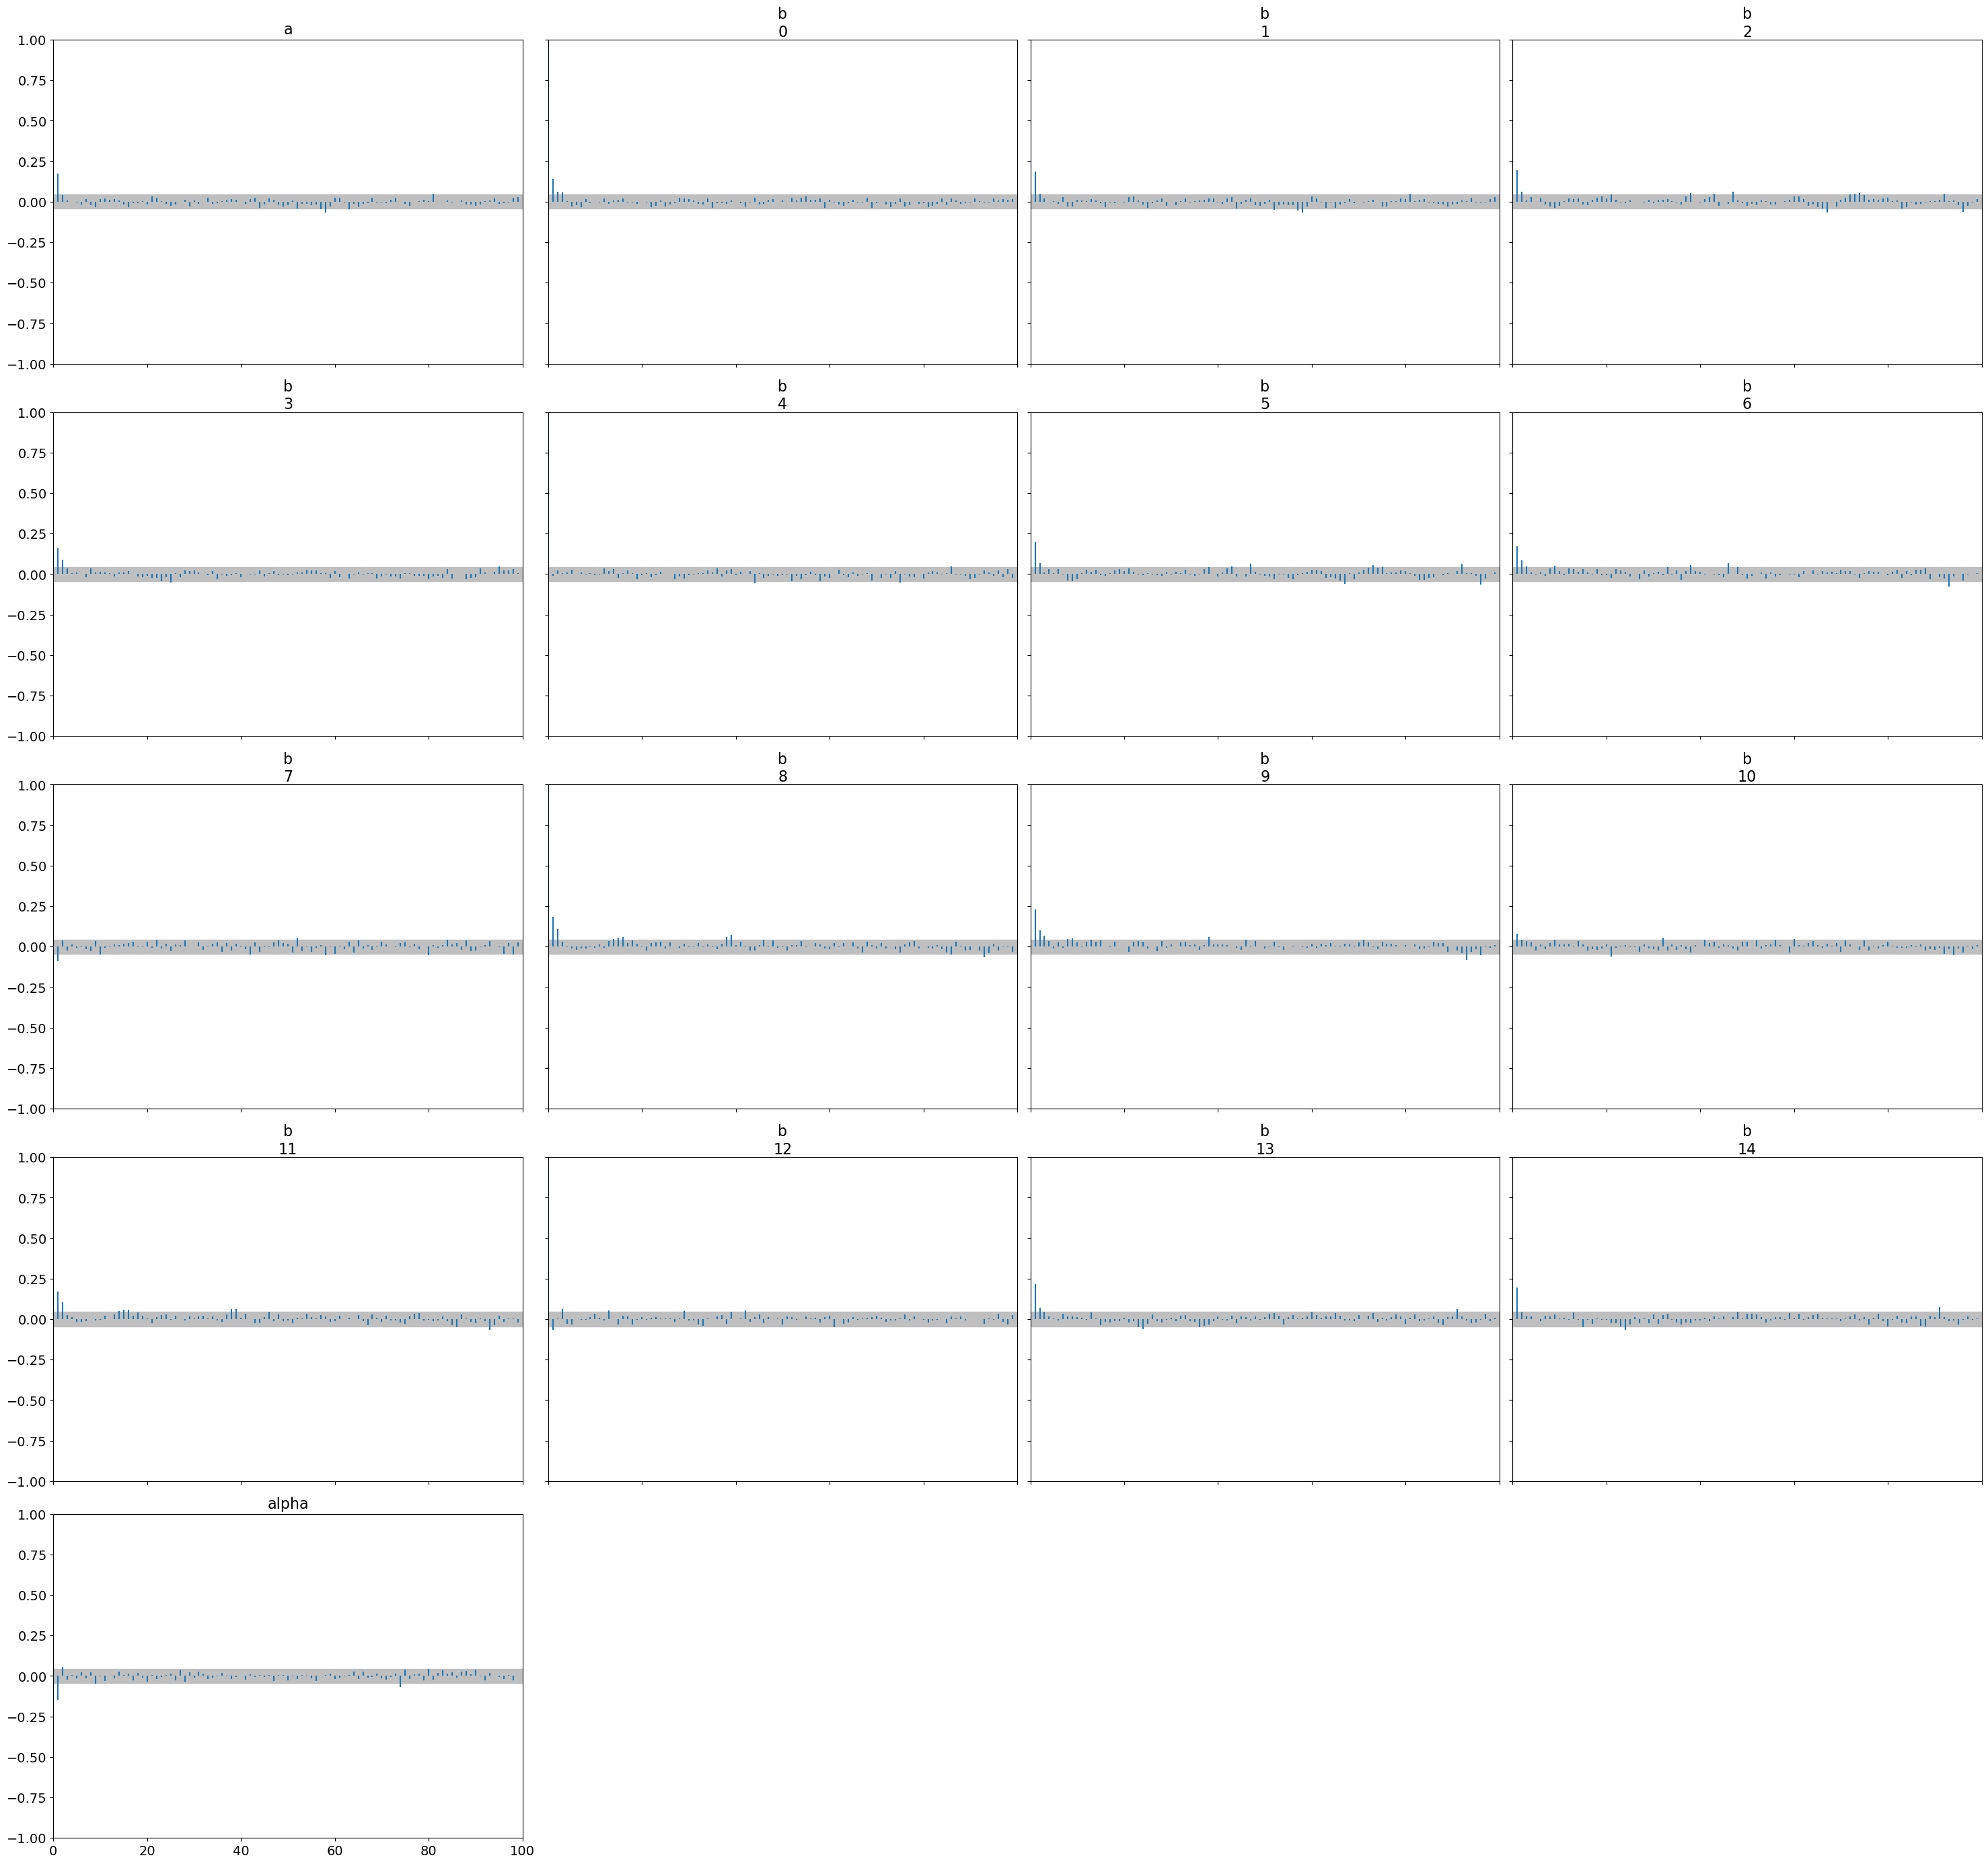

In [9]:
az.plot_autocorr(task_fix_empathy_trace, combined=True);

##### Posterior predictive check

In [10]:
task_fix_ppc = modeler.generate_model_ppc(task_fix_empathy, task_fix_empathy_trace)

In [11]:
sampled_labels = task_fix_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(task_fix_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.14
MAPE:9.92%


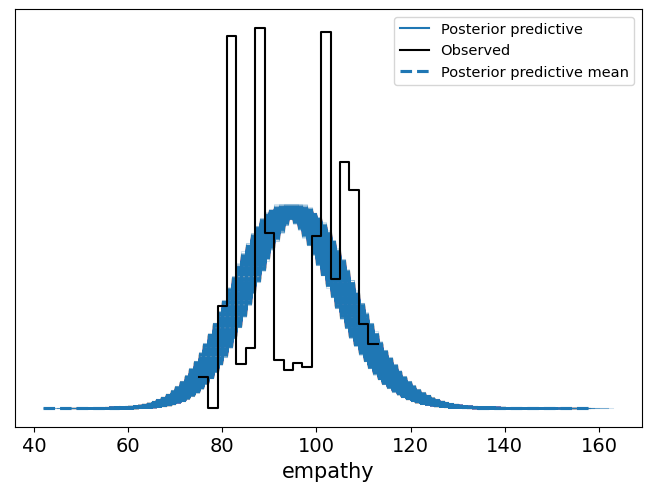

In [12]:
az.plot_ppc(task_fix_ppc);

##### Test predictions

In [17]:
task_fix_features_test, task_fix_labels_test, task_sac_features_test, task_sac_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="task")
task_fix_predictions = modeler.generate_model_predictions(task_fix_empathy, task_fix_features_test, task_fix_empathy_trace)
rmse, mape = modeler.get_regression_evaluation(task_fix_predictions, task_fix_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.31
MAPE:9.54%


#### __Saccades__

In [6]:
task_sac_empathy, task_sac_empathy_trace = modeler.generate_neg_binomial_regression_model("task_sac_neg_bin_regression", task_sac_features_train, task_sac_labels_train)

Sampling 2 chains for 7_000 tune and 1_000 draw iterations (14_000 + 2_000 draws total) took 5823 seconds.


Saving model...


##### Sampling diagnostics

In [7]:
az.summary(task_sac_empathy_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.606   0.007    4.592    4.620      0.000    0.000    1706.0   
b[0]     0.004   0.019   -0.032    0.038      0.000    0.000    1611.0   
b[1]    -0.026   0.010   -0.046   -0.008      0.000    0.000    1980.0   
b[2]     0.126   0.046    0.035    0.211      0.001    0.001    1746.0   
b[3]     0.074   0.034    0.009    0.136      0.001    0.001    1568.0   
b[4]    -0.029   0.025   -0.072    0.019      0.001    0.000    2106.0   
b[5]    -0.121   0.033   -0.183   -0.057      0.001    0.001    1699.0   
b[6]     0.063   0.013    0.039    0.087      0.000    0.000    1471.0   
b[7]     0.004   0.002    0.000    0.008      0.000    0.000    2776.0   
b[8]    -0.005   0.012   -0.029    0.017      0.000    0.000    1416.0   
b[9]    -0.079   0.018   -0.113   -0.047      0.000    0.000    1398.0   
b[10]    0.021   0.009    0.003    0.038      0.000    0.000    1448.0   
b[11]   -0.016   0.013   -0.039    0.010      0.000    0.000    1467.0   
b[12]   -0.001   0.002   -0.006    0.003      0.000    0.000    2026.0   
b[13]   -0.016   0.007   -0.029   -0.003      0.000    0.000    2020.0   
b[14]   -0.018   0.006   -0.029   -0.006      0.000    0.000    2251.0   
b[15]   -0.088   0.013   -0.112   -0.062      0.000    0.000    2065.0   
b[16]   -0.012   0.012   -0.033    0.011      0.000    0.000    2082.0   
alpha  603.136  24.335  556.777  648.081      0.507    0.361    2371.0   

       ess_tail  r_hat  
a        1399.0   1.00  
b[0]     1355.0   1.00  
b[1]     1699.0   1.00  
b[2]     1378.0   1.00  
b[3]     1531.0   1.00  
b[4]     1280.0   1.00  
b[5]     1510.0   1.00  
b[6]     1511.0   1.00  
b[7]     1420.0   1.00  
b[8]     1102.0   1.00  
b[9]     1313.0   1.00  
b[10]    1265.0   1.00  
b[11]    1200.0   1.01  
b[12]    1646.0   1.00  
b[13]    1585.0   1.00  
b[14]    1501.0   1.00  
b[15]    1445.0   1.00  
b[16]    1478.0   1.00  
alpha    1243.0   1.00

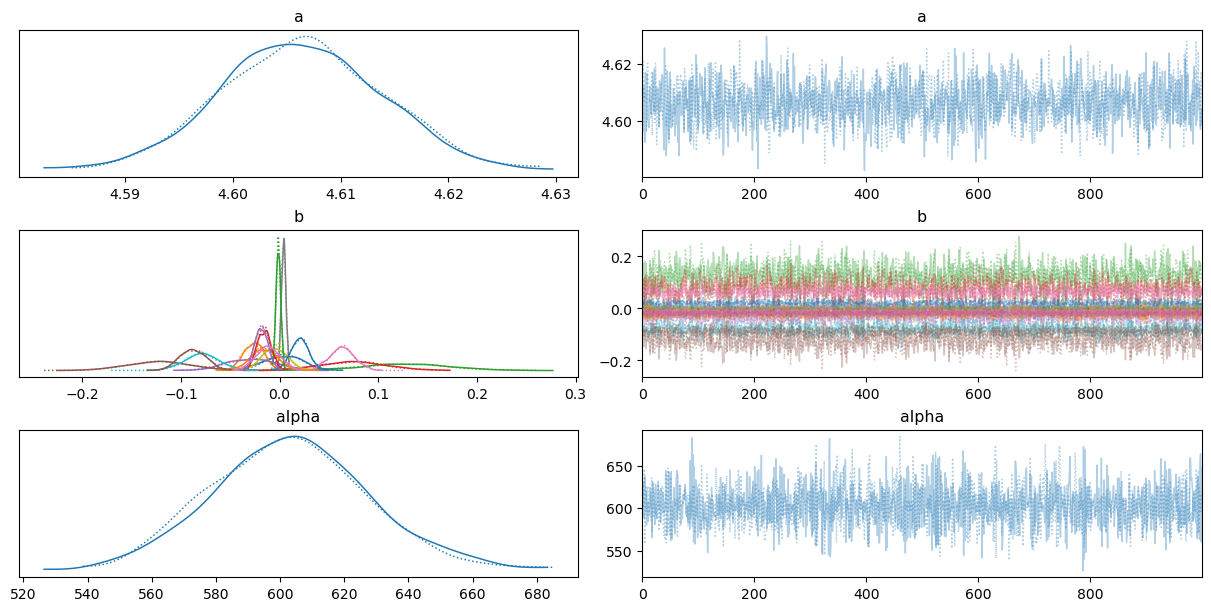

In [8]:
az.plot_trace(task_sac_empathy_trace);

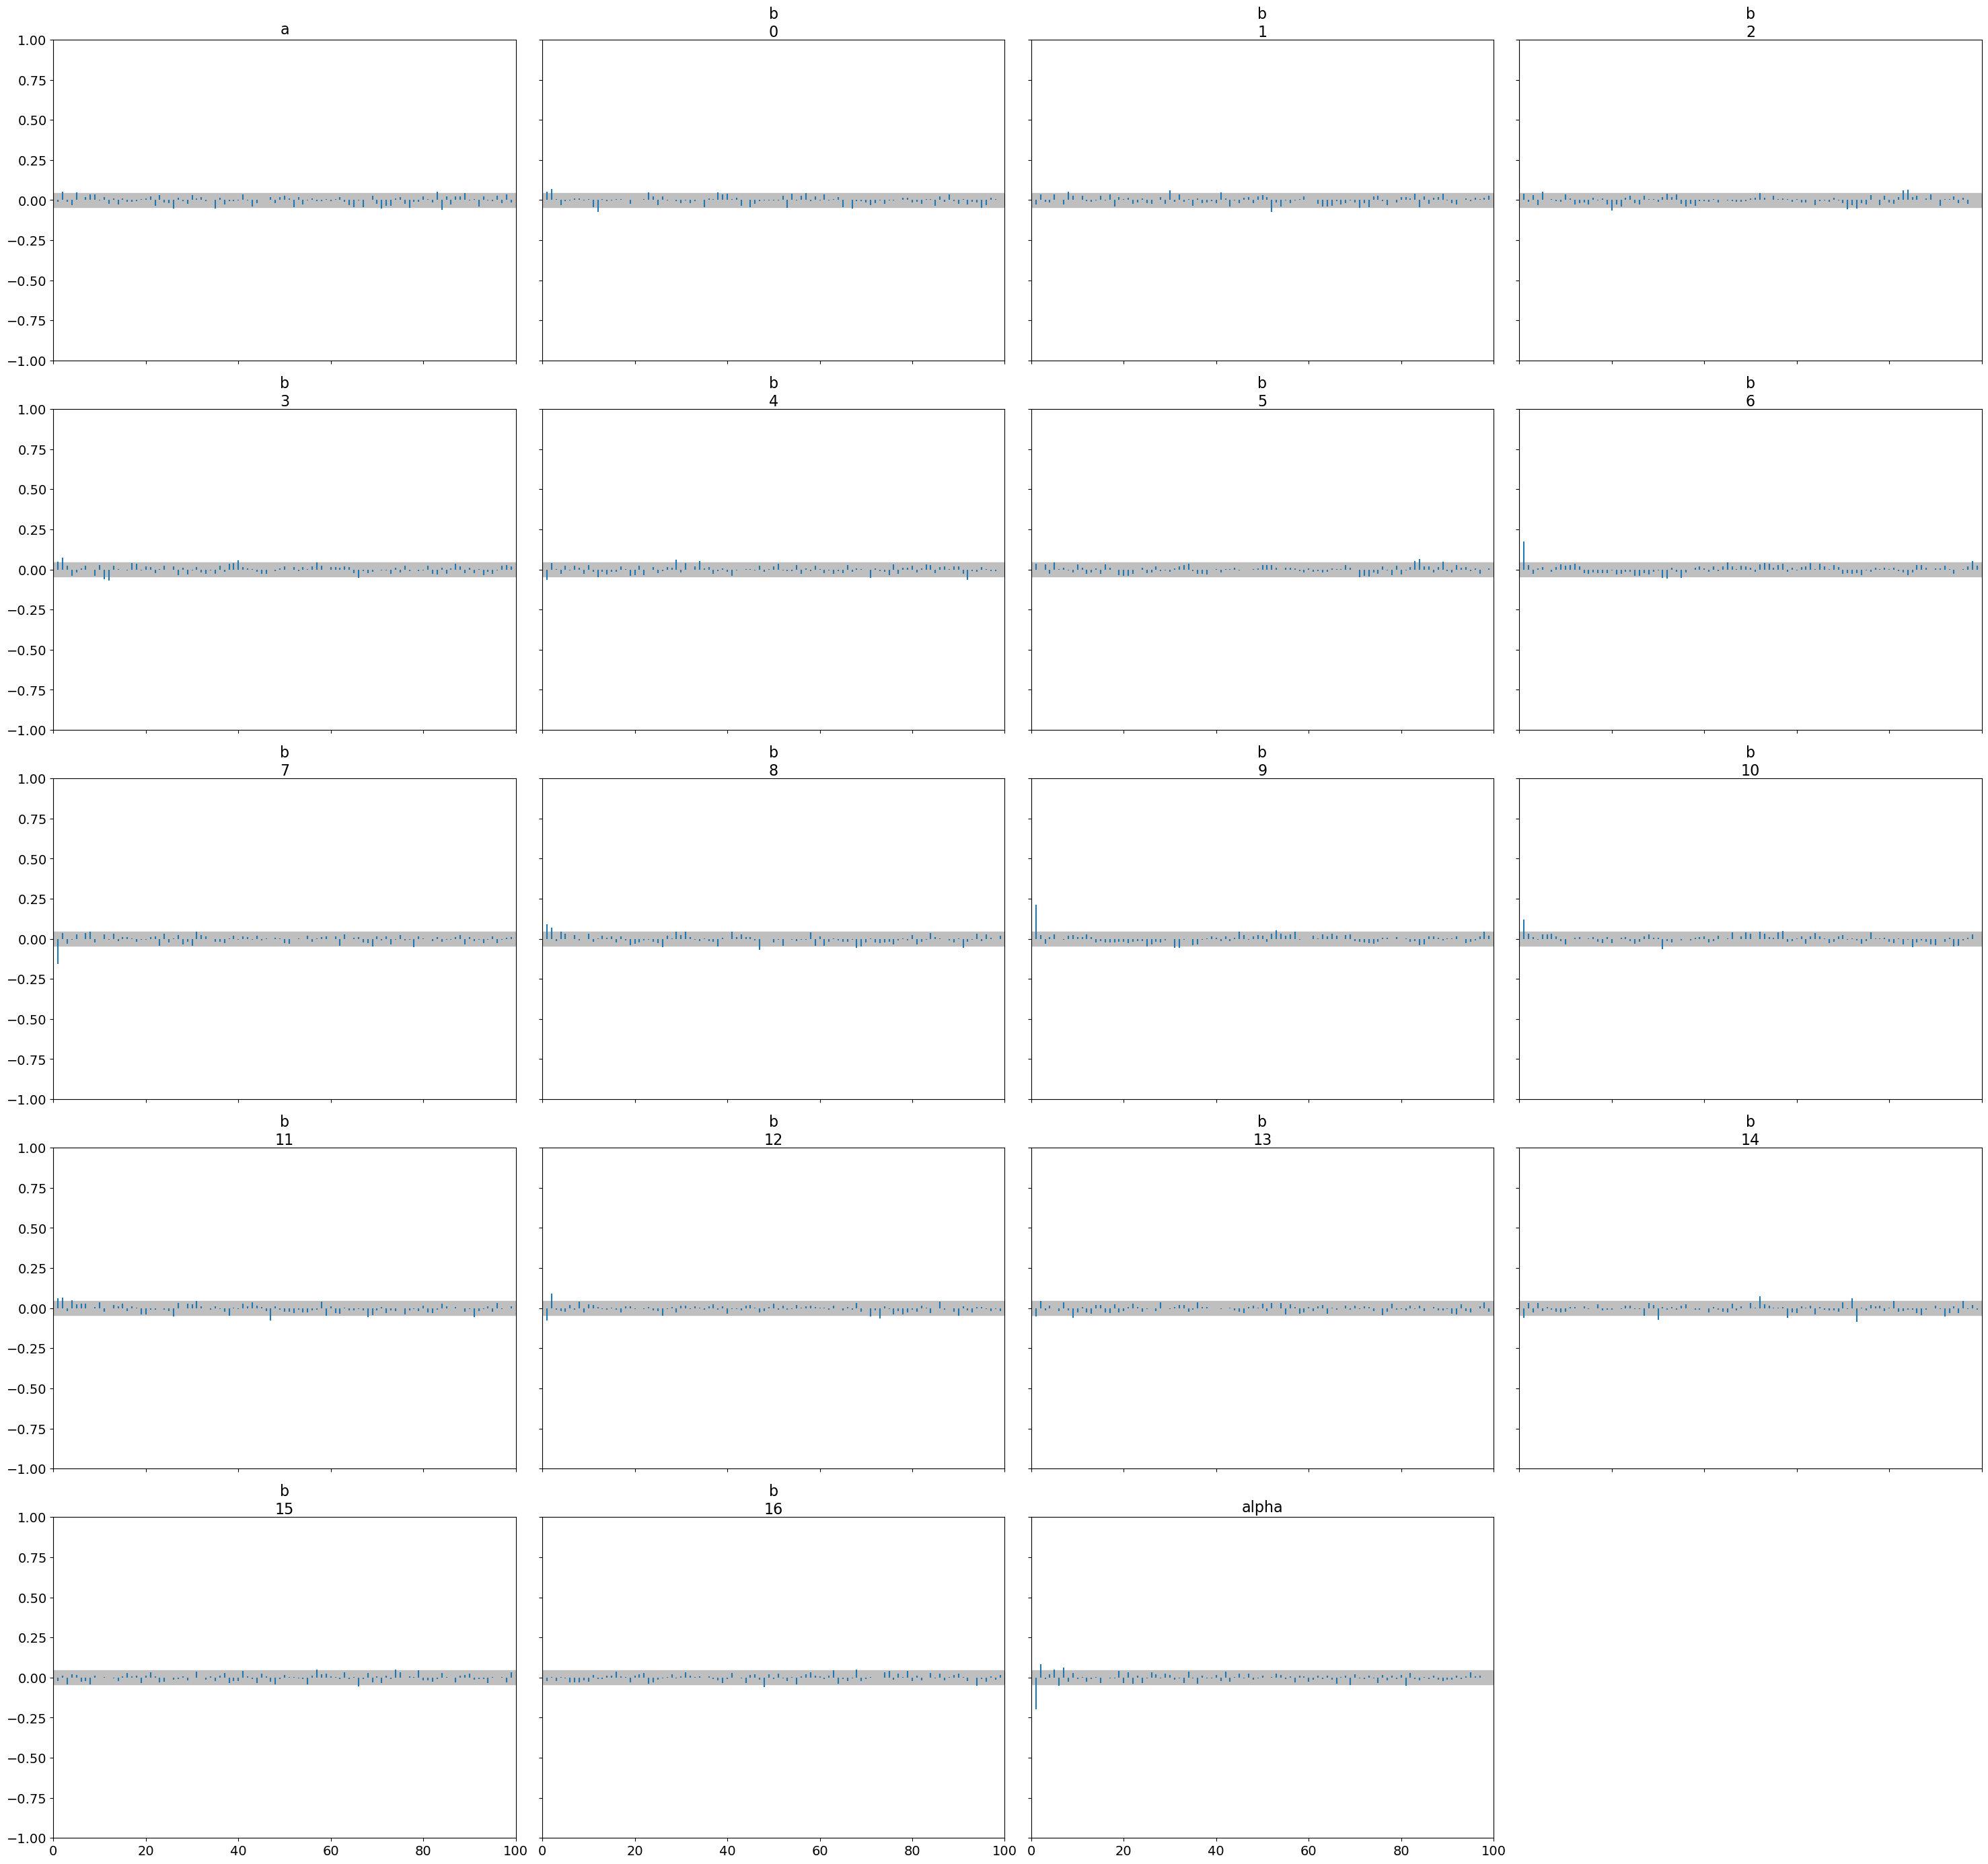

In [9]:
az.plot_autocorr(task_sac_empathy_trace, combined=True);

##### Posterior predictive check

In [10]:
task_sac_ppc = modeler.generate_model_ppc(task_sac_empathy, task_sac_empathy_trace)

In [11]:
sampled_labels = task_sac_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(task_sac_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.25
MAPE:10.17%


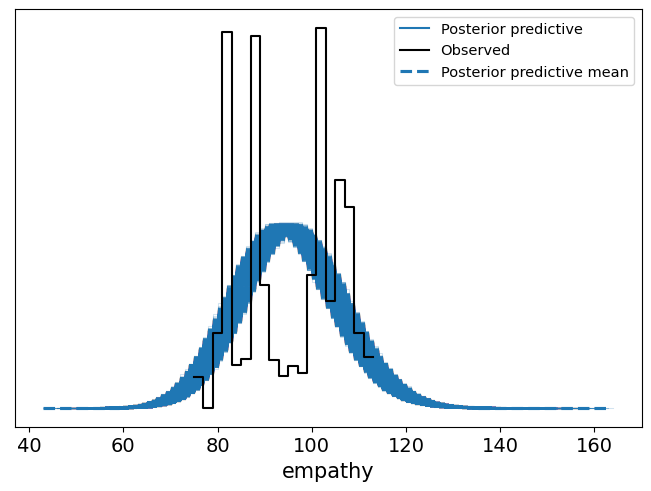

In [12]:
az.plot_ppc(task_sac_ppc);

##### Test predictions

In [18]:
task_sac_predictions = modeler.generate_model_predictions(task_sac_empathy, task_sac_features_test, task_sac_empathy_trace)
rmse, mape = modeler.get_regression_evaluation(task_sac_predictions, task_sac_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.26
MAPE:9.85%


#### __Combined predictions__

In [19]:
task_fix_stimuli, task_sac_stimuli = loader.get_stimuli("test", "task")
predicted_empathy = modeler.combine_predictions(task_fix_predictions, task_fix_stimuli, task_sac_predictions, task_sac_stimuli)
real_empathy_values = [task_oriented_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.11
MAPE:9.97%


### __Cognitive empathy__

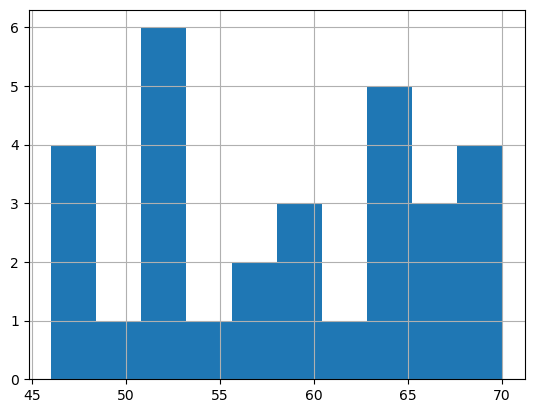

In [11]:
task_oriented_cognitive_empathy = loader.load_eyeT_empathy_levels(experiment= "task", type="cognitive")
task_oriented_cognitive_empathy.hist();

#### __Fixations__

In [5]:
task_fix_cog_features_train, task_fix_cog_labels_train, task_sac_cog_features_train, task_sac_cog_labels_train =  loader.get_eyeT_features_and_labels("train", "task", type ="cognitive")

In [6]:
task_fix_cog_empathy, task_fix_cog_trace = modeler.generate_neg_binomial_regression_model("task_fix_cognitive_neg_bin_regression", task_fix_cog_features_train, task_fix_cog_labels_train)

##### Sampling diagnostics

In [8]:
az.summary(task_fix_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.164   0.023    4.121    4.208      0.001    0.001    1101.0   
b[0]    -0.021   0.150   -0.281    0.295      0.004    0.003    1466.0   
b[1]    -0.067   0.031   -0.123   -0.010      0.001    0.001    1080.0   
b[2]     0.289   0.066    0.159    0.404      0.002    0.001    1107.0   
b[3]     0.123   0.064    0.000    0.243      0.002    0.001    1306.0   
b[4]    -0.027   0.015   -0.054    0.000      0.000    0.000    1723.0   
b[5]    -0.308   0.051   -0.403   -0.210      0.002    0.001    1106.0   
b[6]    -0.089   0.028   -0.141   -0.040      0.001    0.001    1040.0   
b[7]     0.009   0.003    0.003    0.015      0.000    0.000    3674.0   
b[8]    -0.136   0.020   -0.177   -0.103      0.001    0.000    1057.0   
b[9]     0.116   0.031    0.058    0.173      0.001    0.001     942.0   
b[10]   -0.058   0.012   -0.080   -0.033      0.000    0.000    1895.0   
b[11]    0.078   0.019    0.042    0.114      0.001    0.000    1095.0   
b[12]   -0.036   0.013   -0.061   -0.011      0.000    0.000    1646.0   
b[13]    0.097   0.015    0.068    0.124      0.000    0.000    1408.0   
b[14]   -0.141   0.014   -0.166   -0.115      0.000    0.000    1397.0   
alpha  745.495  37.386  672.972  810.857      0.736    0.522    2606.0   

       ess_tail  r_hat  
a         861.0   1.00  
b[0]     1224.0   1.00  
b[1]     1000.0   1.00  
b[2]      892.0   1.00  
b[3]     1267.0   1.01  
b[4]     1480.0   1.00  
b[5]     1137.0   1.00  
b[6]     1450.0   1.00  
b[7]     1559.0   1.00  
b[8]     1142.0   1.00  
b[9]     1296.0   1.00  
b[10]    1571.0   1.00  
b[11]    1183.0   1.00  
b[12]    1433.0   1.00  
b[13]    1602.0   1.00  
b[14]    1481.0   1.00  
alpha    1331.0   1.00

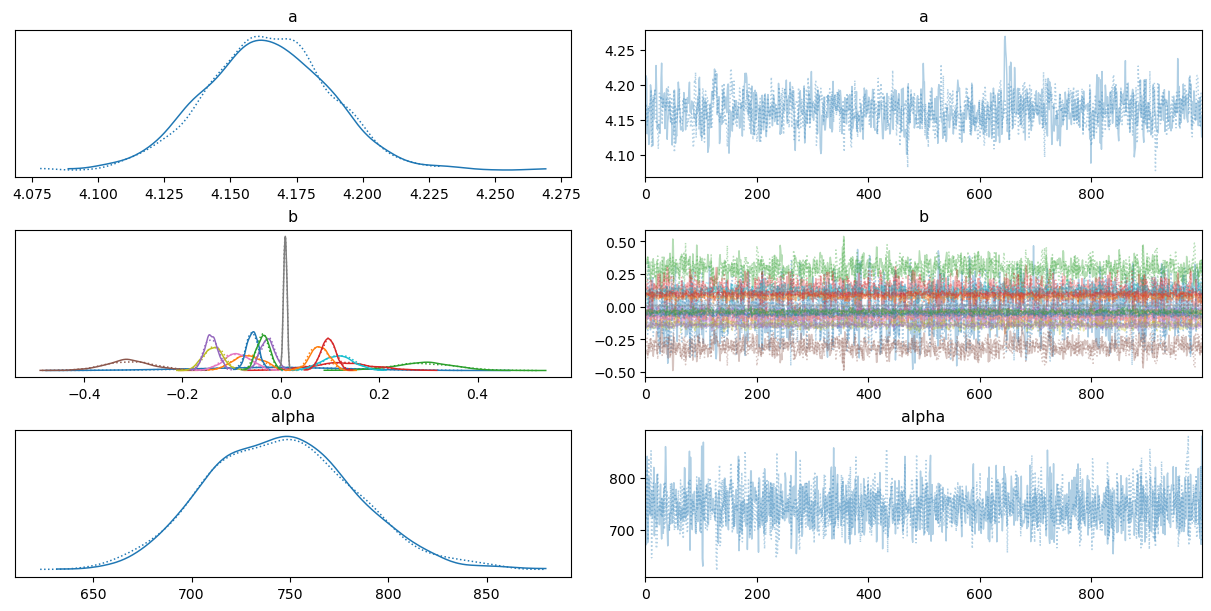

In [9]:
az.plot_trace(task_fix_cog_trace);

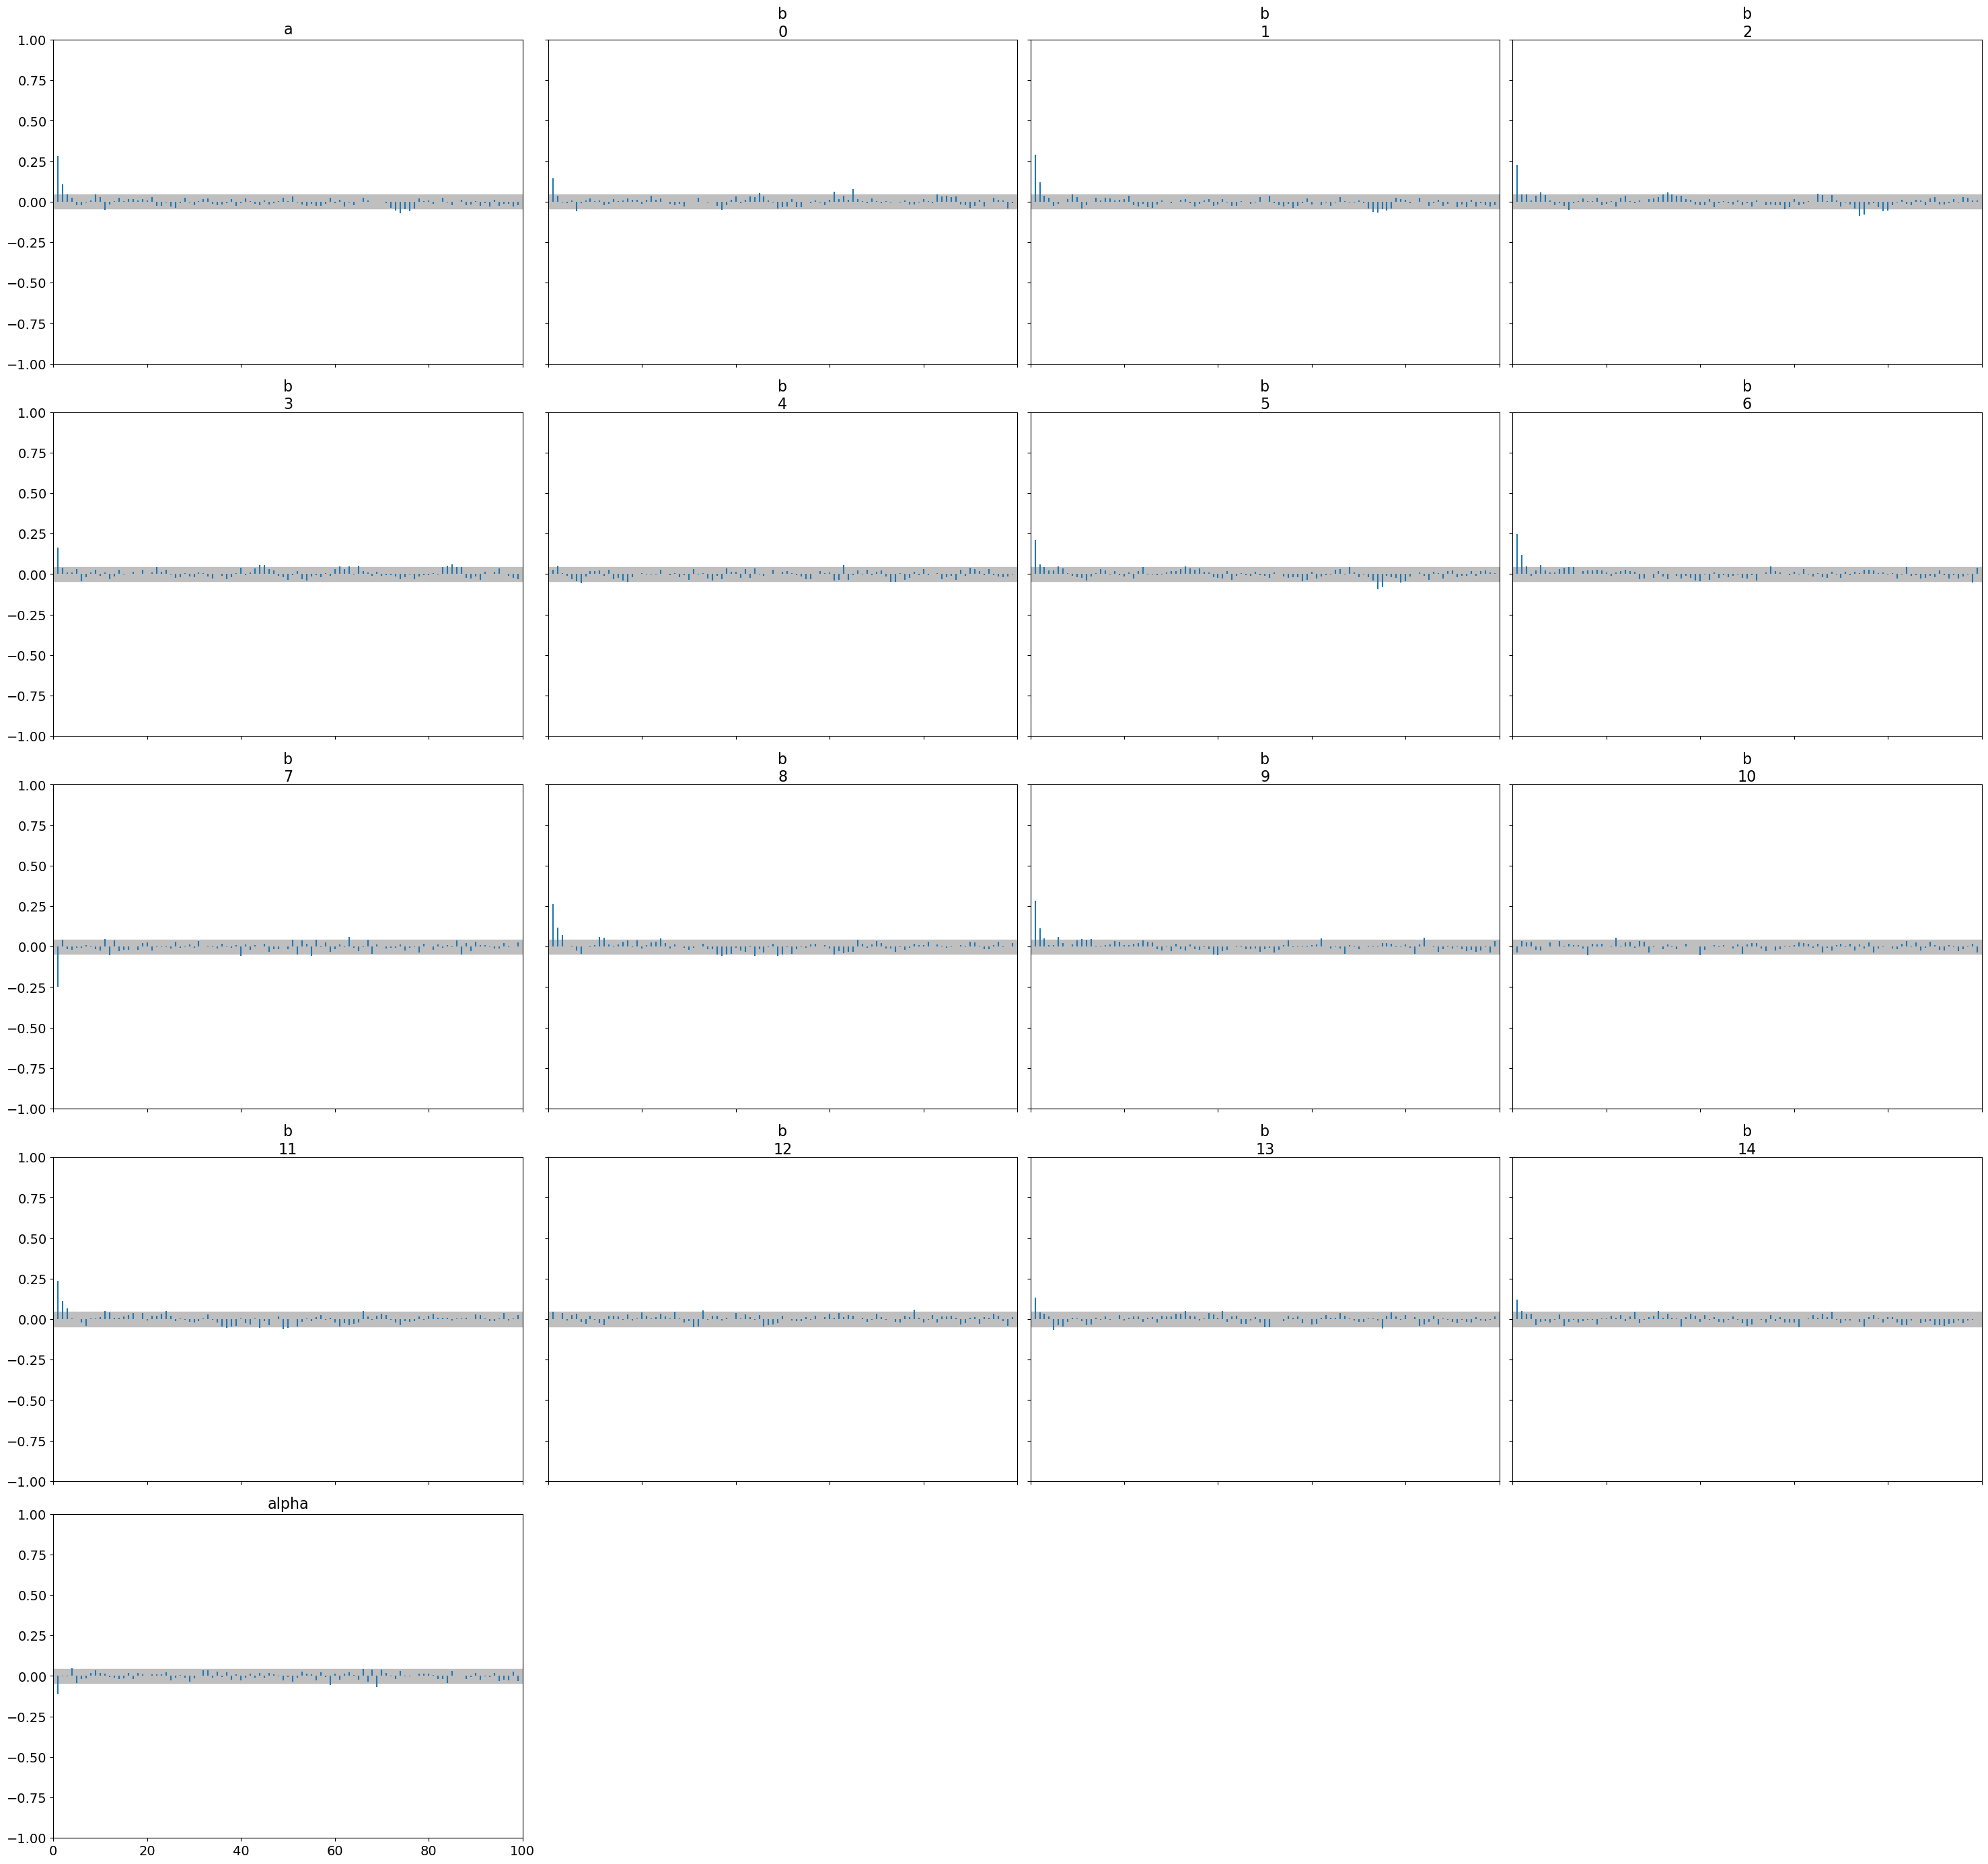

In [10]:
az.plot_autocorr(task_fix_cog_trace, combined = True);

##### Posterior predictive

In [11]:
task_fix_cog_ppc = modeler.generate_model_ppc(task_fix_cog_empathy, task_fix_cog_trace)
sampled_labels = task_fix_cog_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_fix_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.63
MAPE:12.3%


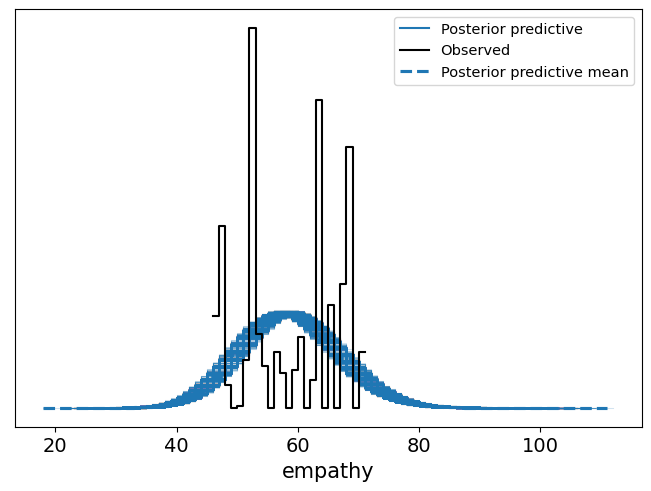

In [12]:
az.plot_ppc(task_fix_cog_ppc);

##### Predictions

In [7]:
task_fix_cog_features_test, task_fix_cog_labels_test, _, _ =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="cognitive")
task_fix_cog_predictions = modeler.generate_model_predictions(task_fix_cog_empathy, task_fix_cog_features_test, task_fix_cog_trace)
rmse, mape = modeler.get_regression_evaluation(task_fix_cog_predictions, task_fix_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.89
MAPE:12.23%


#### __Saccades__

In [8]:
task_sac_cog_empathy, task_sac_cog_trace = modeler.generate_neg_binomial_regression_model("task_sac_cognitive_neg_bin_regression", task_sac_cog_features_train, task_sac_cog_labels_train)

##### Sampling diagnostics

In [8]:
az.summary(task_sac_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.103   0.010    4.085    4.121      0.000    0.000    1652.0   
b[0]     0.014   0.024   -0.031    0.059      0.001    0.001    1579.0   
b[1]    -0.014   0.013   -0.039    0.010      0.000    0.000    1618.0   
b[2]     0.143   0.060    0.028    0.250      0.002    0.001    1361.0   
b[3]     0.078   0.045   -0.009    0.156      0.001    0.001    1526.0   
b[4]    -0.009   0.031   -0.064    0.051      0.001    0.001    1439.0   
b[5]    -0.155   0.044   -0.241   -0.078      0.001    0.001    1405.0   
b[6]     0.082   0.016    0.050    0.111      0.000    0.000    1390.0   
b[7]     0.002   0.003   -0.003    0.007      0.000    0.000    2296.0   
b[8]     0.007   0.015   -0.020    0.036      0.000    0.000    1563.0   
b[9]    -0.089   0.022   -0.126   -0.043      0.001    0.000    1287.0   
b[10]    0.014   0.011   -0.007    0.035      0.000    0.000    1285.0   
b[11]   -0.025   0.016   -0.056    0.003      0.000    0.000    1653.0   
b[12]   -0.002   0.003   -0.007    0.004      0.000    0.000    1695.0   
b[13]   -0.036   0.009   -0.053   -0.020      0.000    0.000    1671.0   
b[14]   -0.011   0.008   -0.026    0.004      0.000    0.000    1686.0   
b[15]    0.078   0.017    0.043    0.108      0.000    0.000    1682.0   
b[16]   -0.117   0.015   -0.146   -0.089      0.000    0.000    1600.0   
alpha  557.490  28.459  508.071  612.590      0.571    0.407    2518.0   

       ess_tail  r_hat  
a        1370.0   1.00  
b[0]     1111.0   1.00  
b[1]     1393.0   1.00  
b[2]     1118.0   1.00  
b[3]     1266.0   1.00  
b[4]     1318.0   1.00  
b[5]     1057.0   1.00  
b[6]     1230.0   1.00  
b[7]     1439.0   1.00  
b[8]     1355.0   1.00  
b[9]     1139.0   1.00  
b[10]    1214.0   1.00  
b[11]    1312.0   1.00  
b[12]    1657.0   1.00  
b[13]    1333.0   1.00  
b[14]    1231.0   1.00  
b[15]    1344.0   1.00  
b[16]    1387.0   1.00  
alpha    1212.0   1.01

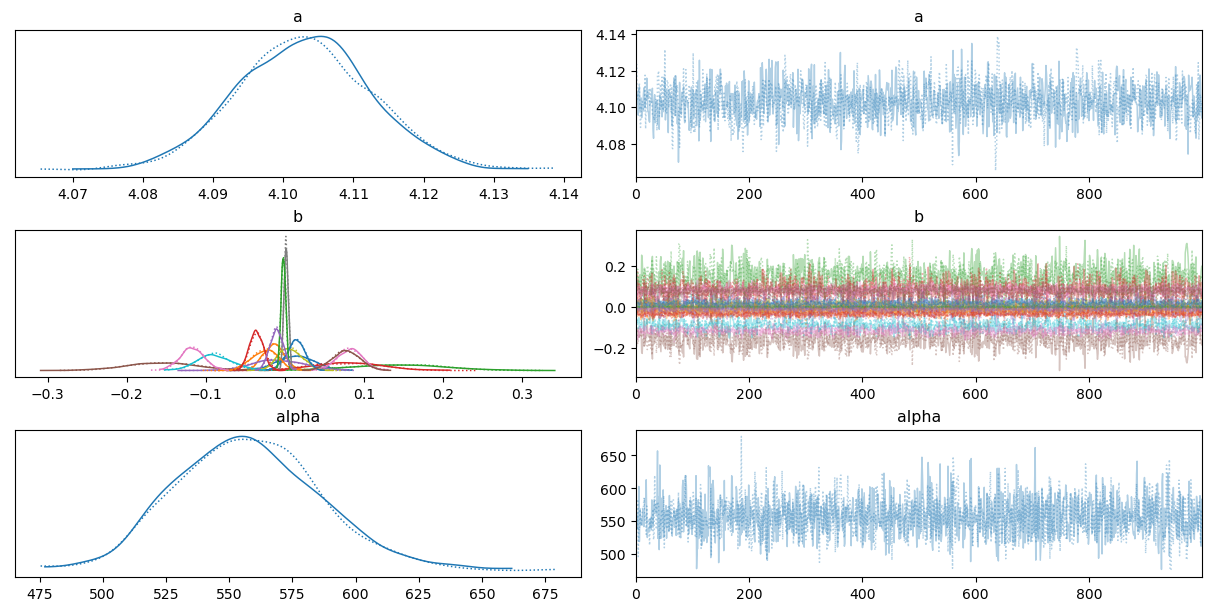

In [9]:
az.plot_trace(task_sac_cog_trace);

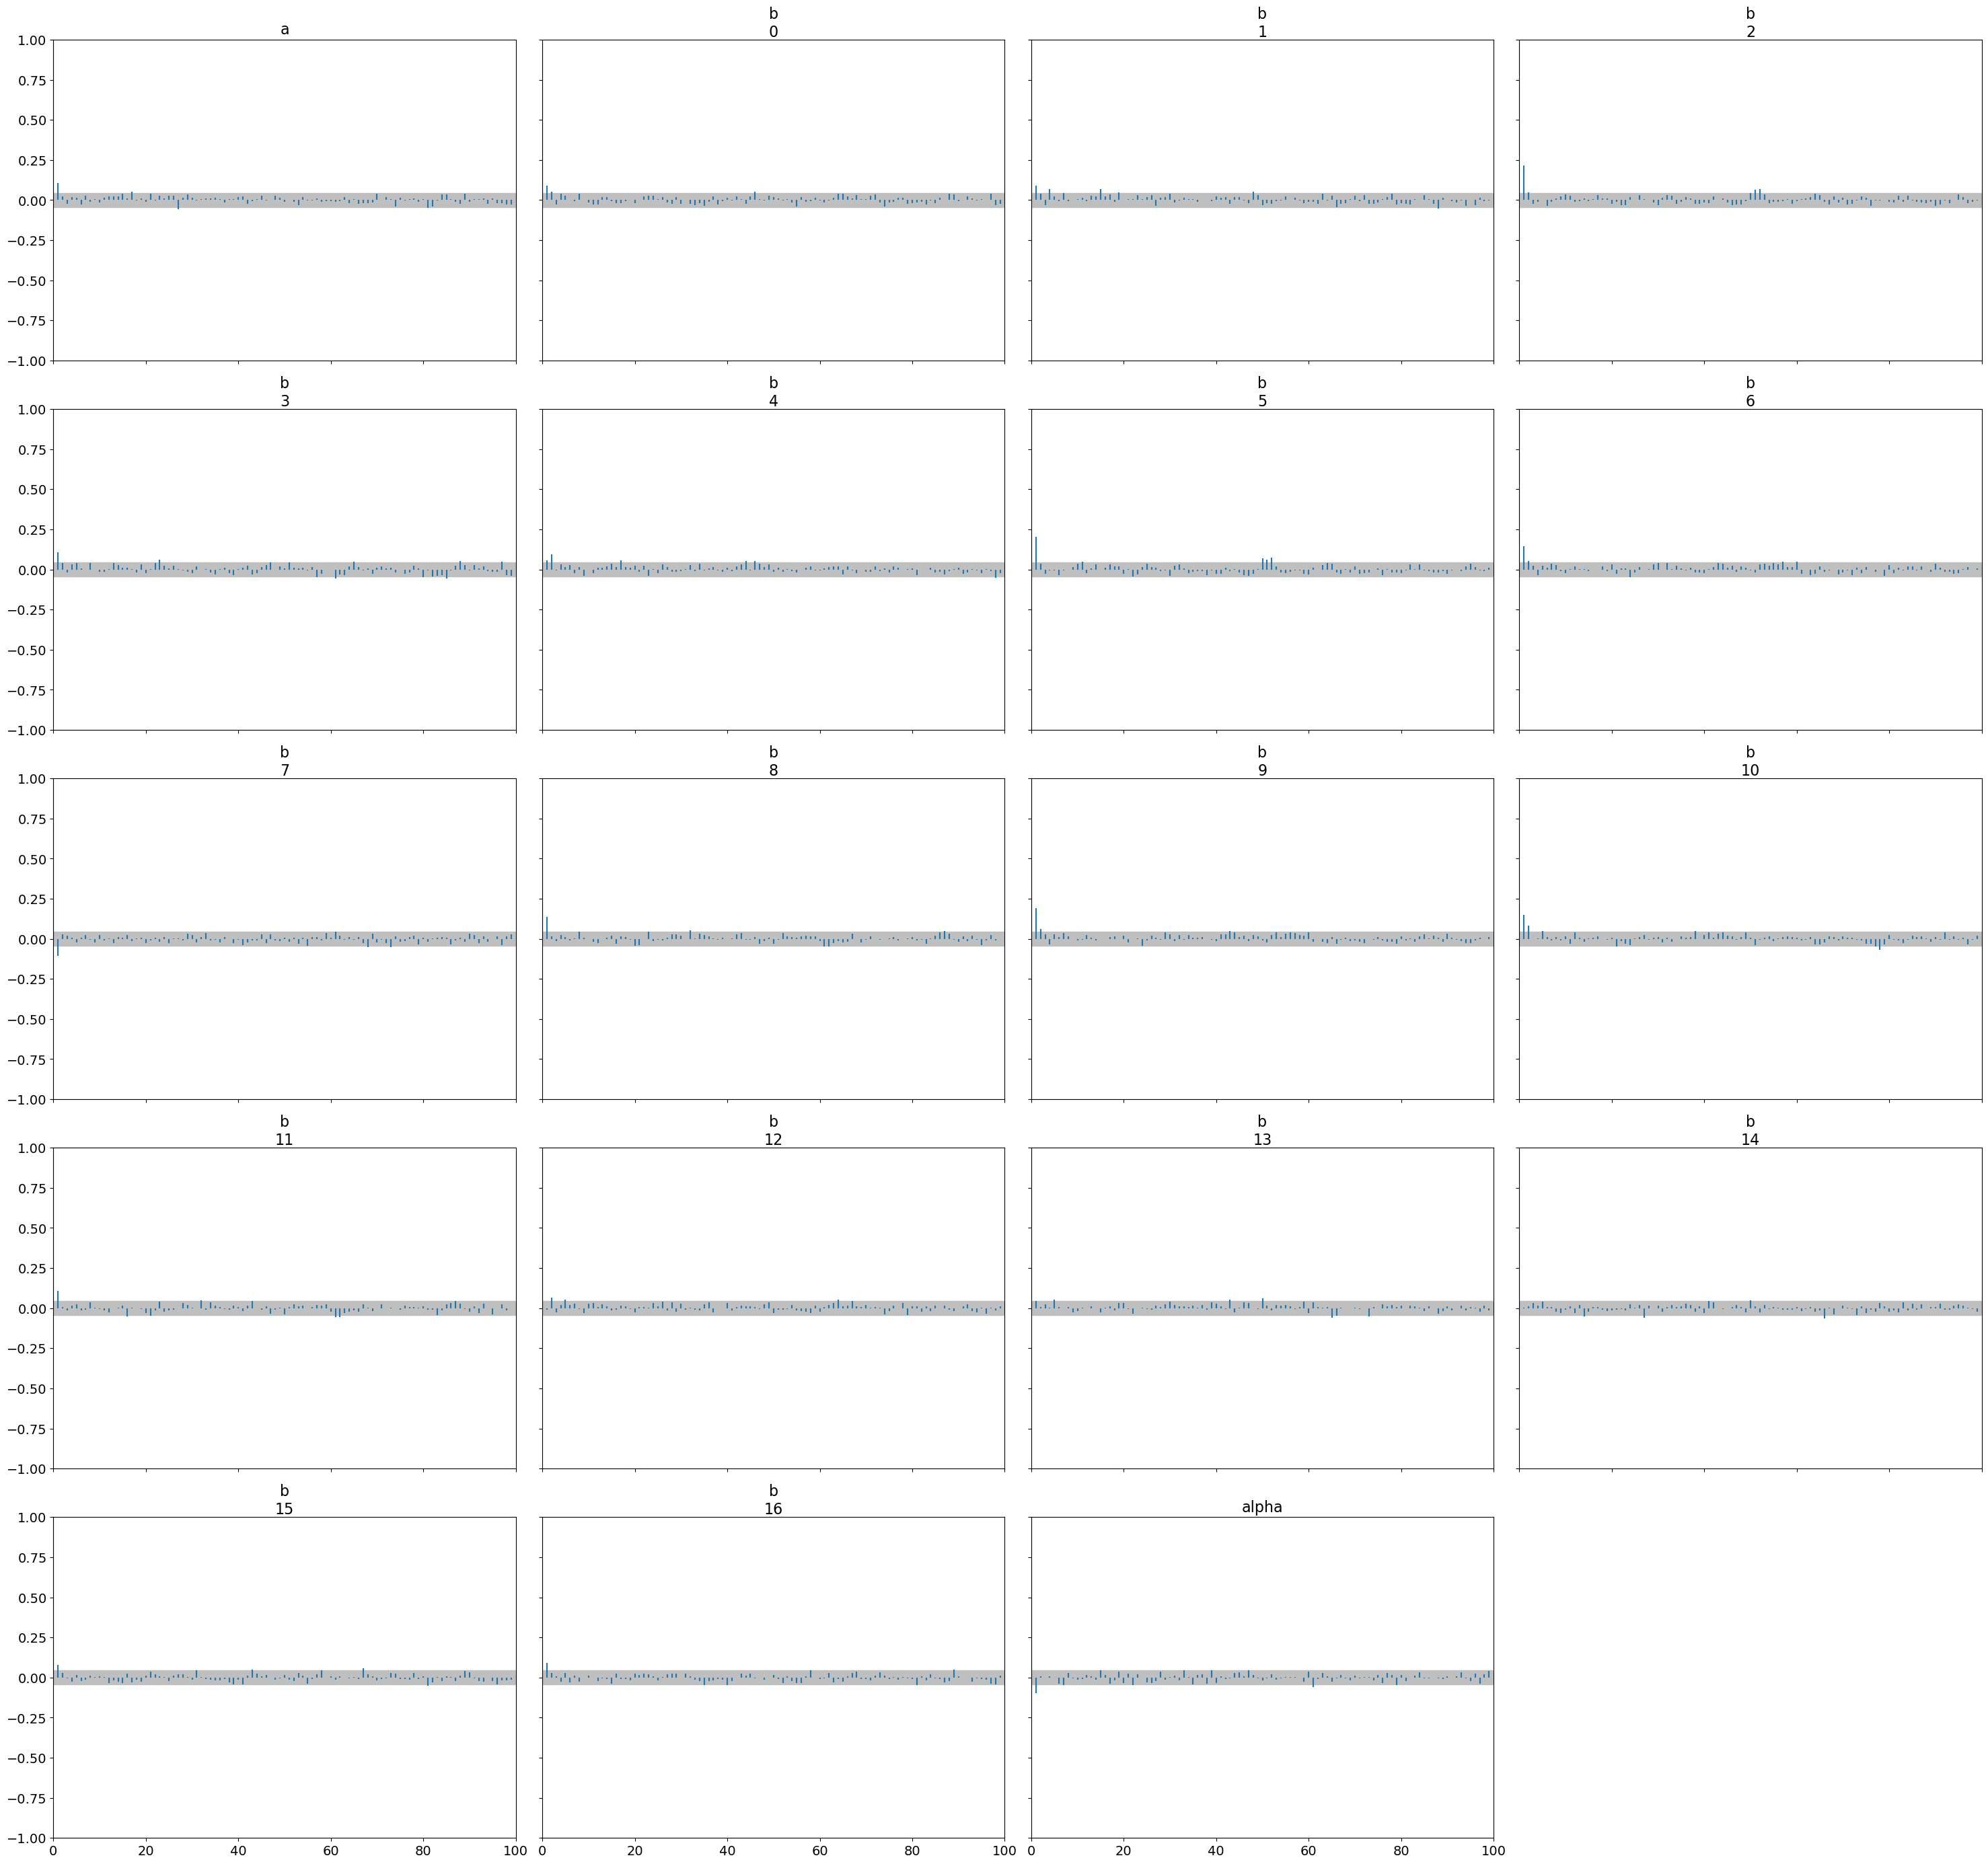

In [10]:
az.plot_autocorr(task_sac_cog_trace, combined=True);

##### Posterior predictive

In [11]:
task_sac_cog_ppc = modeler.generate_model_ppc(task_sac_cog_empathy, task_sac_cog_trace)
sampled_labels = task_sac_cog_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_sac_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.79
MAPE:12.69%


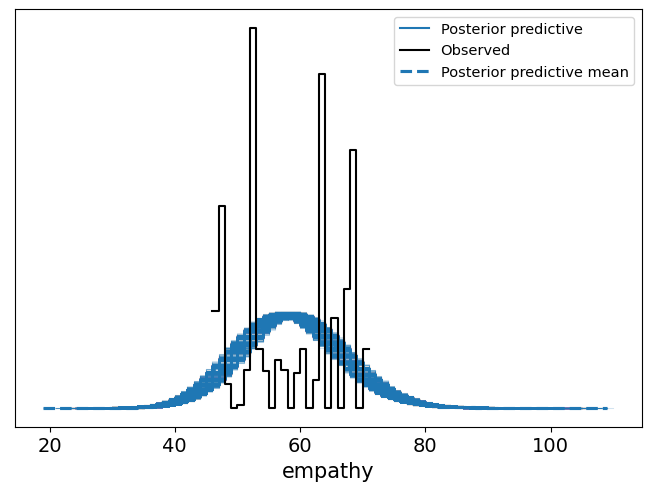

In [12]:
az.plot_ppc(task_sac_cog_ppc);

##### Predictions

In [9]:
_, _, task_sac_cog_features_test, task_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="cognitive")
task_sac_cog_predictions = modeler.generate_model_predictions(task_sac_cog_empathy, task_sac_cog_features_test, task_sac_cog_trace)
rmse, mape = modeler.get_regression_evaluation(task_sac_cog_predictions, task_sac_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.96
MAPE:12.56%


#### __Combined predictions__

In [12]:
task_fix_cog_stimuli, task_sac_cog_stimuli = loader.get_stimuli("test", "task")
predicted_cog_empathy = modeler.combine_predictions(task_fix_cog_predictions, task_fix_cog_stimuli, task_sac_cog_predictions, task_sac_cog_stimuli)
real_empathy_values = [task_oriented_cognitive_empathy[k[1]] for k in predicted_cog_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_values, [level for level in predicted_cog_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.72
MAPE:12.68%


### __Affective empathy__

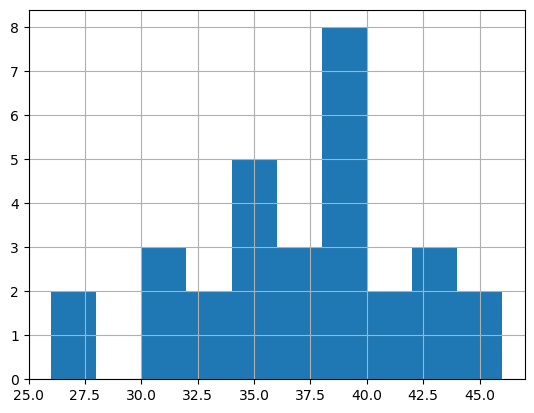

In [4]:
task_oriented_affective_empathy = loader.load_eyeT_empathy_levels(experiment= "task", type="affective")
task_oriented_affective_empathy.hist();

In [5]:
task_fix_aff_features_train, task_fix_aff_labels_train, task_sac_aff_features_train, task_sac_aff_labels_train =  loader.get_eyeT_features_and_labels("train", "task", type ="affective")

#### __Fixations__

In [6]:
task_fix_aff_empathy, task_fix_aff_trace = modeler.generate_neg_binomial_regression_model("task_fix_affective_neg_bin_regression", task_fix_aff_features_train, task_fix_aff_labels_train)

##### Sampling diagnostics

In [18]:
az.summary(task_fix_aff_trace)

mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a         3.720   0.028     3.669     3.774      0.001    0.001    1081.0   
b[0]     -0.115   0.183    -0.461     0.221      0.004    0.003    1822.0   
b[1]     -0.080   0.037    -0.147    -0.009      0.001    0.001    1073.0   
b[2]      0.068   0.082    -0.086     0.219      0.003    0.002    1033.0   
b[3]      0.146   0.078     0.008     0.299      0.002    0.001    1734.0   
b[4]     -0.057   0.018    -0.089    -0.023      0.000    0.000    2117.0   
b[5]     -0.014   0.064    -0.131     0.107      0.002    0.001    1047.0   
b[6]     -0.122   0.035    -0.188    -0.059      0.001    0.001     995.0   
b[7]     -0.000   0.004    -0.008     0.007      0.000    0.000    3968.0   
b[8]     -0.012   0.026    -0.062     0.033      0.001    0.001     987.0   
b[9]      0.121   0.040     0.050     0.194      0.001    0.001     856.0   
b[10]    -0.008   0.015    -0.033     0.021      0.000    0.000    1368.0   
b[11]    -0.023   0.025    -0.070     0.020      0.001    0.001    1031.0   
b[12]     0.044   0.017     0.013     0.074      0.000    0.000    2514.0   
b[13]    -0.319   0.019    -0.355    -0.286      0.001    0.000    1307.0   
b[14]     0.140   0.017     0.109     0.173      0.000    0.000    1327.0   
alpha  1720.166  68.529  1594.956  1852.617      1.220    0.864    3171.0   

       ess_tail  r_hat  
a        1337.0    1.0  
b[0]     1653.0    1.0  
b[1]     1251.0    1.0  
b[2]     1380.0    1.0  
b[3]     1631.0    1.0  
b[4]     1557.0    1.0  
b[5]     1177.0    1.0  
b[6]      990.0    1.0  
b[7]     1553.0    1.0  
b[8]     1050.0    1.0  
b[9]      940.0    1.0  
b[10]    1533.0    1.0  
b[11]    1040.0    1.0  
b[12]    1508.0    1.0  
b[13]    1288.0    1.0  
b[14]    1414.0    1.0  
alpha    1577.0    1.0

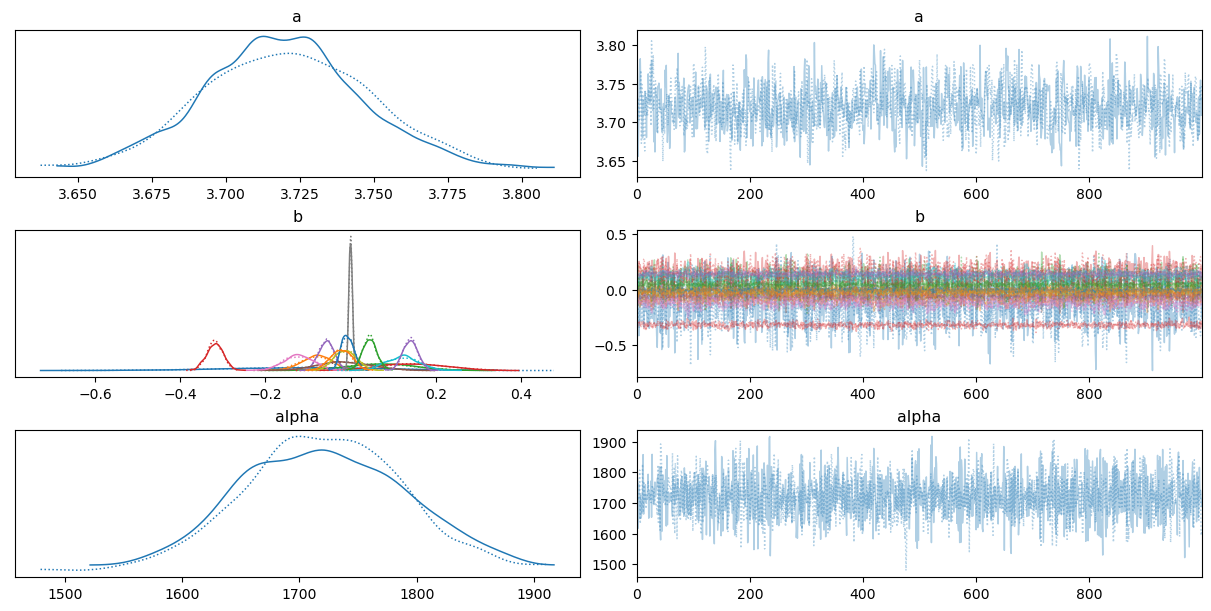

In [19]:
az.plot_trace(task_fix_aff_trace);

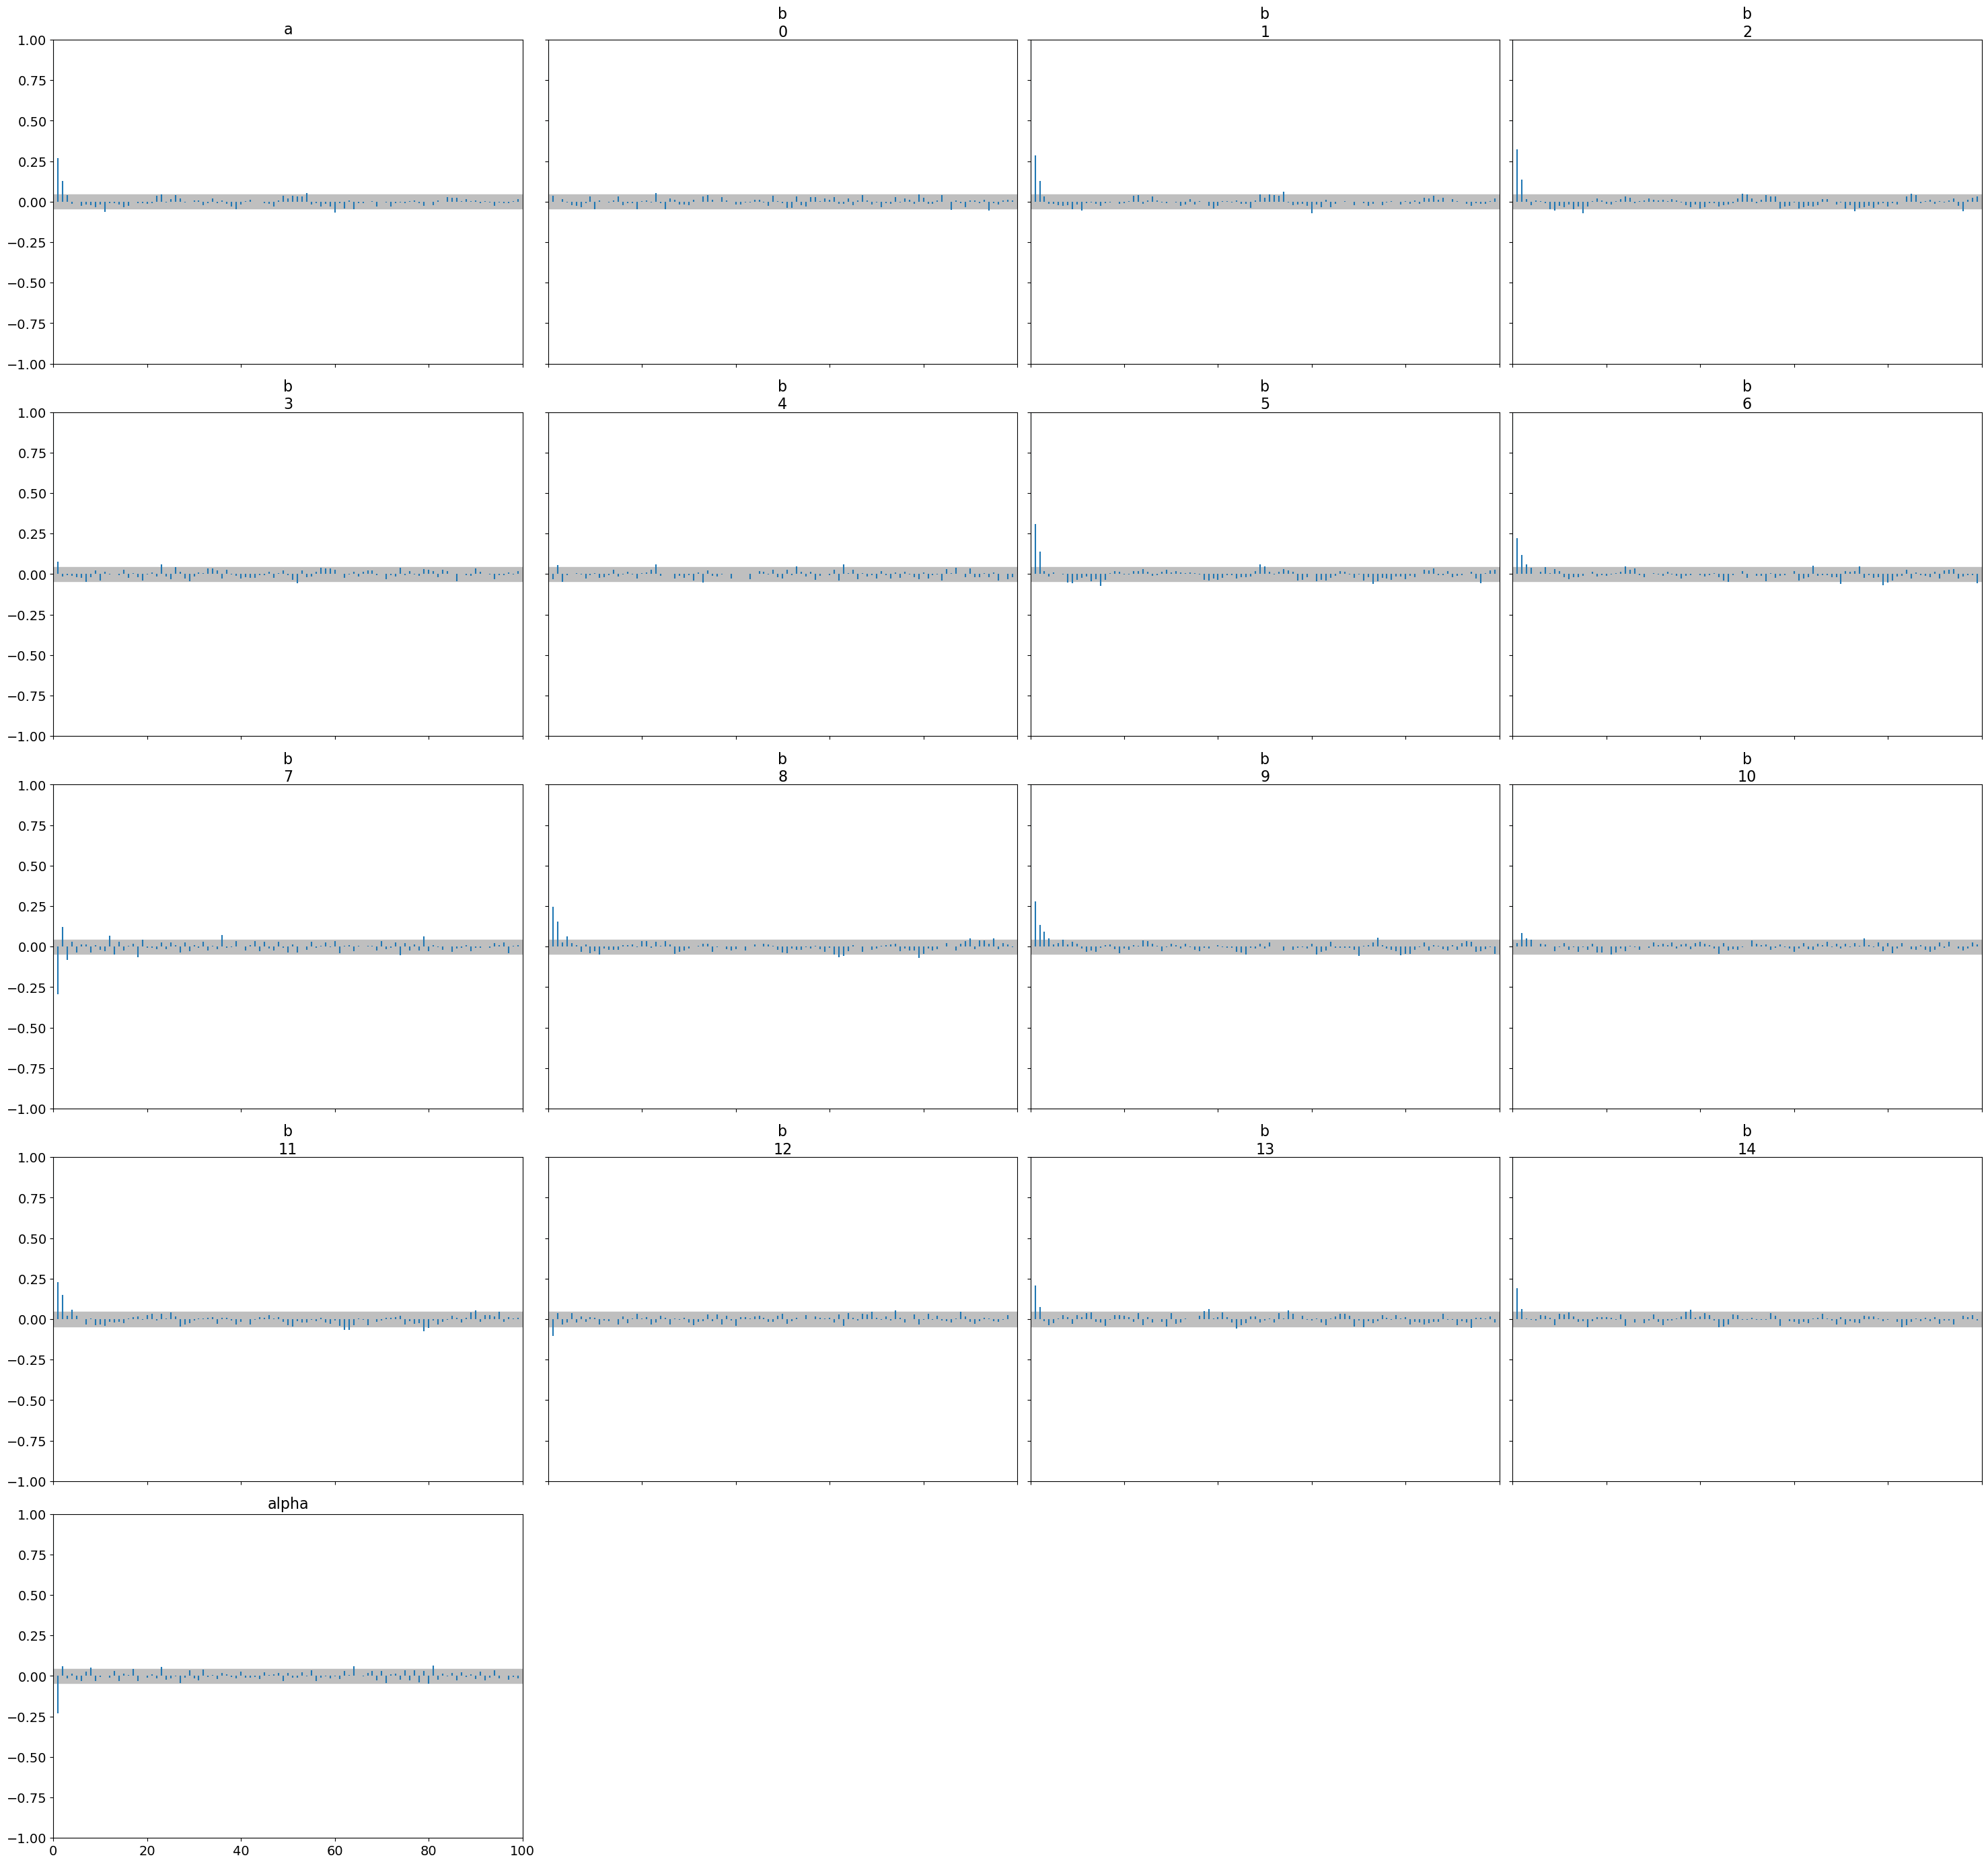

In [20]:
az.plot_autocorr(task_fix_aff_trace, combined=True);

##### Posterior predictive

In [21]:
task_fix_aff_ppc = modeler.generate_model_ppc(task_fix_aff_empathy, task_fix_aff_trace)
sampled_labels = task_fix_aff_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_fix_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.97
MAPE:8.68%


<AxesSubplot: xlabel='empathy'>

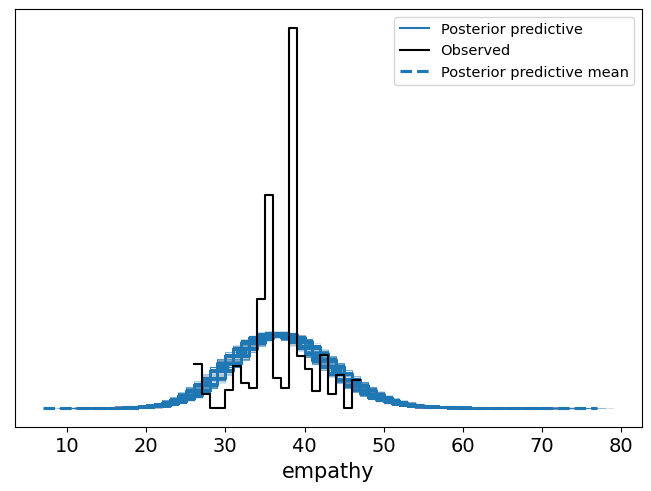

In [22]:
az.plot_ppc(task_fix_aff_ppc)

##### Predictions

In [7]:
task_fix_aff_features_test, task_fix_aff_labels_test, _, _ =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="affective")
task_fix_aff_predictions = modeler.generate_model_predictions(task_fix_aff_empathy, task_fix_aff_features_test, task_fix_aff_trace)
rmse, mape = modeler.get_regression_evaluation(task_fix_aff_predictions, task_fix_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:4.17
MAPE:8.4%


#### __Saccades__

In [8]:
task_sac_aff_empathy, task_sac_aff_trace = modeler.generate_neg_binomial_regression_model("task_sac_affective_neg_binomial_regression", task_sac_aff_features_train, task_sac_aff_labels_train)

Sampling 2 chains for 7_000 tune and 1_000 draw iterations (14_000 + 2_000 draws total) took 5379 seconds.


Saving model...


##### Sampling diagnostics

In [11]:
az.summary(task_sac_aff_trace)

mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a         3.681   0.012     3.659     3.703      0.000    0.000    1643.0   
b[0]     -0.010   0.031    -0.071     0.046      0.001    0.001    2003.0   
b[1]     -0.047   0.016    -0.076    -0.018      0.000    0.000    1713.0   
b[2]      0.095   0.069    -0.033     0.224      0.002    0.001    2082.0   
b[3]      0.065   0.055    -0.043     0.168      0.001    0.001    1980.0   
b[4]     -0.061   0.037    -0.134     0.006      0.001    0.001    2193.0   
b[5]     -0.063   0.051    -0.161     0.030      0.001    0.001    2209.0   
b[6]      0.033   0.019    -0.001     0.069      0.000    0.000    1606.0   
b[7]      0.008   0.003     0.002     0.015      0.000    0.000    2813.0   
b[8]     -0.022   0.018    -0.054     0.012      0.000    0.000    1720.0   
b[9]     -0.062   0.026    -0.109    -0.012      0.001    0.000    1586.0   
b[10]     0.033   0.014     0.008     0.058      0.000    0.000    1659.0   
b[11]    -0.002   0.019    -0.040     0.031      0.000    0.000    1798.0   
b[12]    -0.001   0.004    -0.007     0.006      0.000    0.000    2302.0   
b[13]     0.017   0.011    -0.005     0.036      0.000    0.000    1849.0   
b[14]    -0.031   0.010    -0.049    -0.013      0.000    0.000    2071.0   
b[15]    -0.353   0.021    -0.392    -0.315      0.001    0.000    1691.0   
b[16]     0.156   0.018     0.121     0.189      0.000    0.000    1569.0   
alpha  1582.756  65.005  1461.377  1703.068      1.156    0.817    3157.0   

       ess_tail  r_hat  
a        1408.0    1.0  
b[0]      942.0    1.0  
b[1]     1553.0    1.0  
b[2]     1309.0    1.0  
b[3]     1178.0    1.0  
b[4]     1459.0    1.0  
b[5]     1581.0    1.0  
b[6]     1375.0    1.0  
b[7]     1464.0    1.0  
b[8]     1474.0    1.0  
b[9]     1355.0    1.0  
b[10]    1498.0    1.0  
b[11]    1427.0    1.0  
b[12]    1195.0    1.0  
b[13]    1431.0    1.0  
b[14]    1440.0    1.0  
b[15]    1493.0    1.0  
b[16]    1290.0    1.0  
alpha    1216.0    1.0

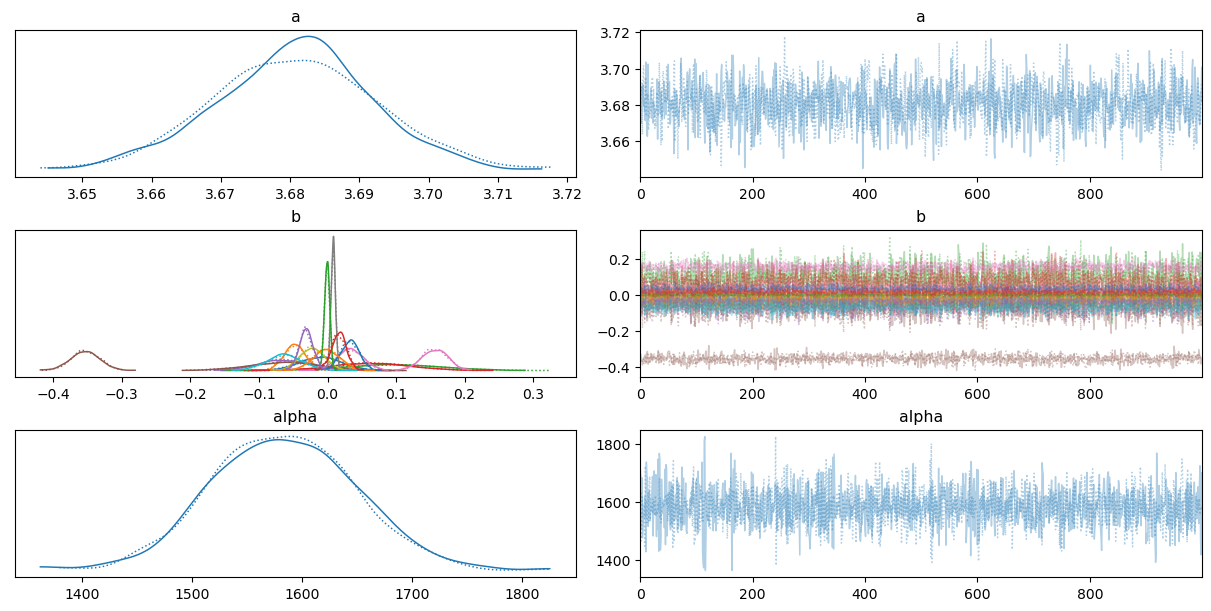

In [12]:
az.plot_trace(task_sac_aff_trace);

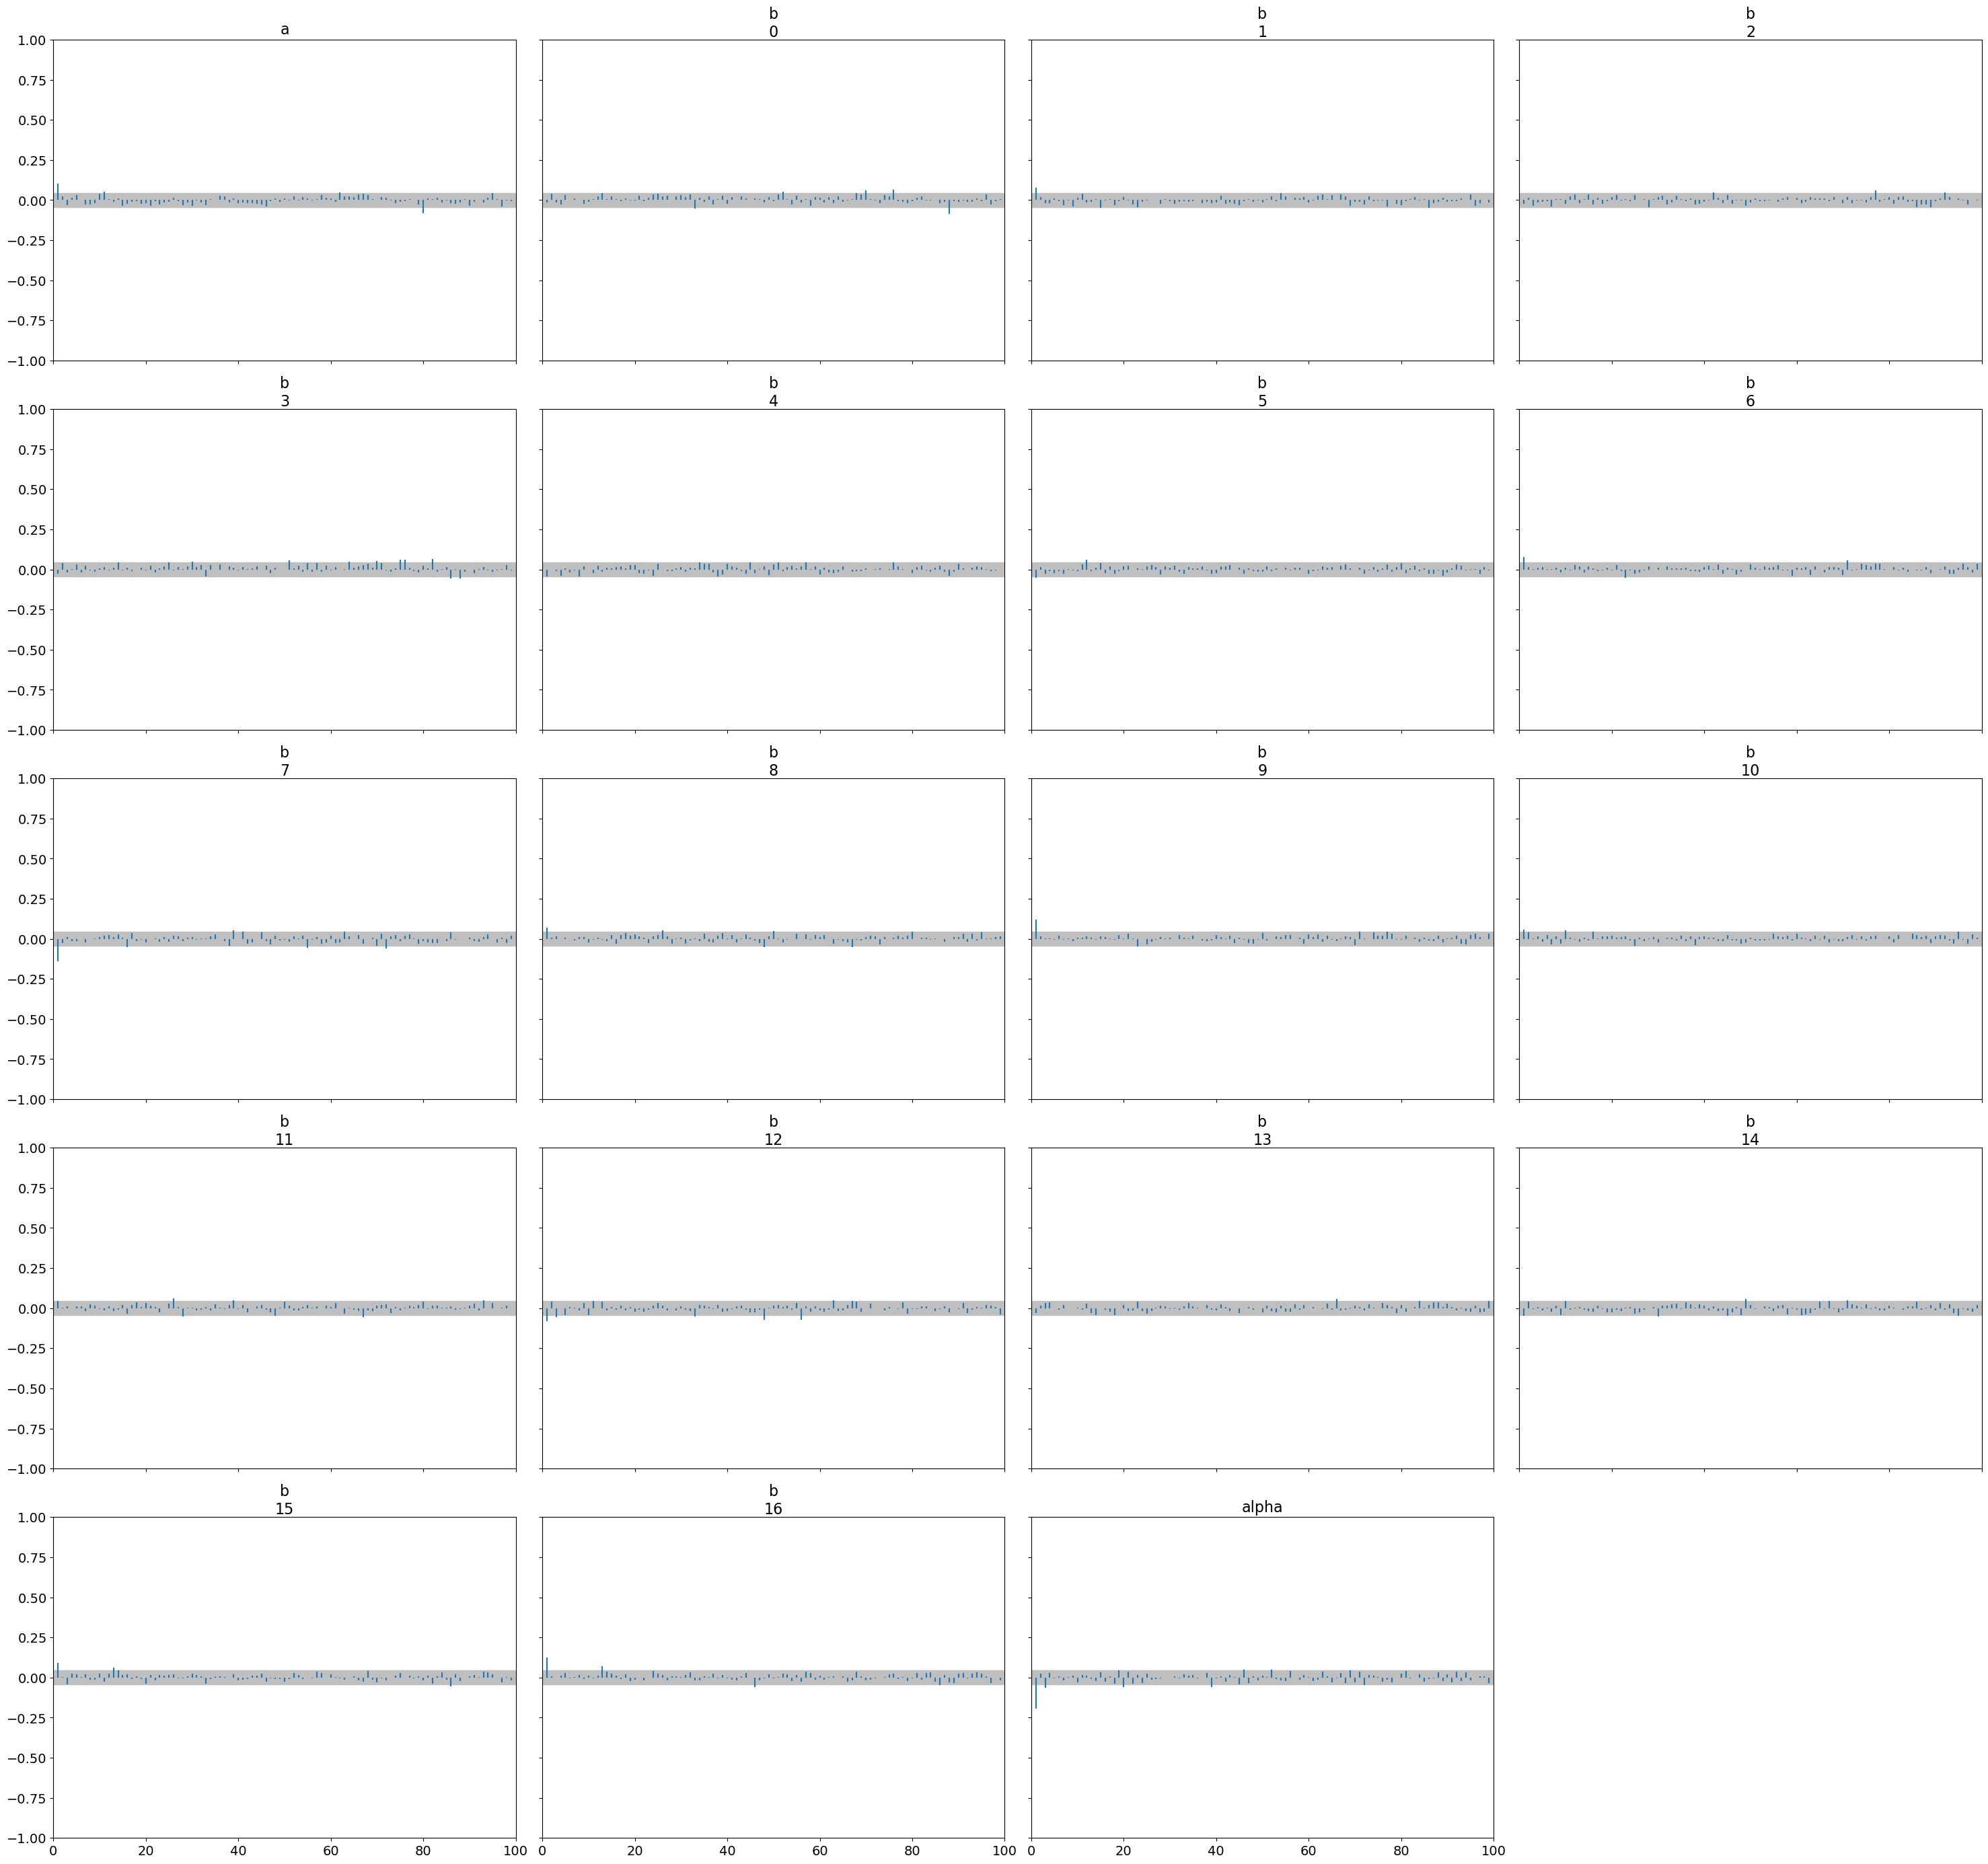

In [13]:
az.plot_autocorr(task_sac_aff_trace, combined = True);

##### Posterior predictive

In [9]:
task_sac_aff_ppc = modeler.generate_model_ppc(task_sac_aff_empathy, task_sac_aff_trace)
sampled_labels = task_sac_aff_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_sac_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.8
MAPE:8.26%


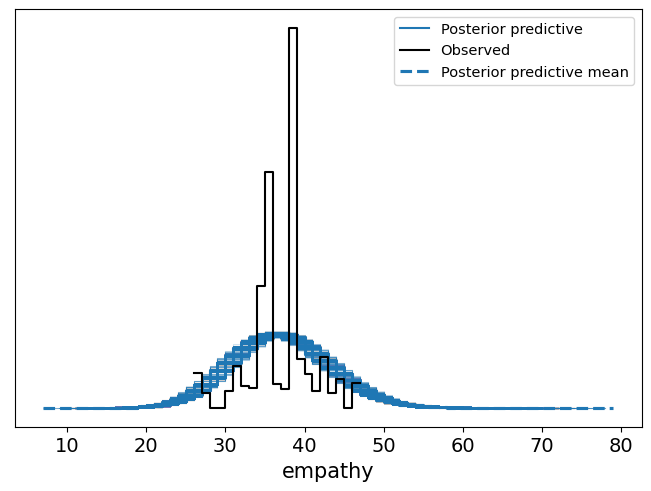

In [10]:
az.plot_ppc(task_sac_aff_ppc);

##### Predictions

In [14]:
_, _,task_sac_aff_features_test, task_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="affective")
task_sac_aff_predictions = modeler.generate_model_predictions(task_sac_aff_empathy, task_sac_aff_features_test, task_sac_aff_trace)
rmse, mape = modeler.get_regression_evaluation(task_sac_aff_predictions, task_sac_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:4.02
MAPE:8.29%


#### __Combined predictions__

In [15]:
task_fix_aff_stimuli, task_sac_aff_stimuli = loader.get_stimuli("test", "task")
predicted_aff_empathy = modeler.combine_predictions(task_fix_aff_predictions, task_fix_aff_stimuli, task_sac_aff_predictions, task_sac_aff_stimuli)
real_empathy_aff_values = [task_oriented_affective_empathy[k[1]] for k in predicted_aff_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_aff_values, [level for level in predicted_aff_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.92
MAPE:8.69%
